# Q5) What is the average distance between player and its target when fighting? Take windows of distances like 0-50, 50-100, 100-200, 200-300, 300-500, 500 to infinity and count the distances when a shot is registered i.e. weapon fired and shot hit target. Do this for each gun in each category. Show in piechart. Relevant features - distToTarget, weaponCategory, weaponUsed

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Professional Dataset

C:\Users\SHUBHAM SUKUM\AppData\Local\Temp\ipykernel_2528\71899886.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')


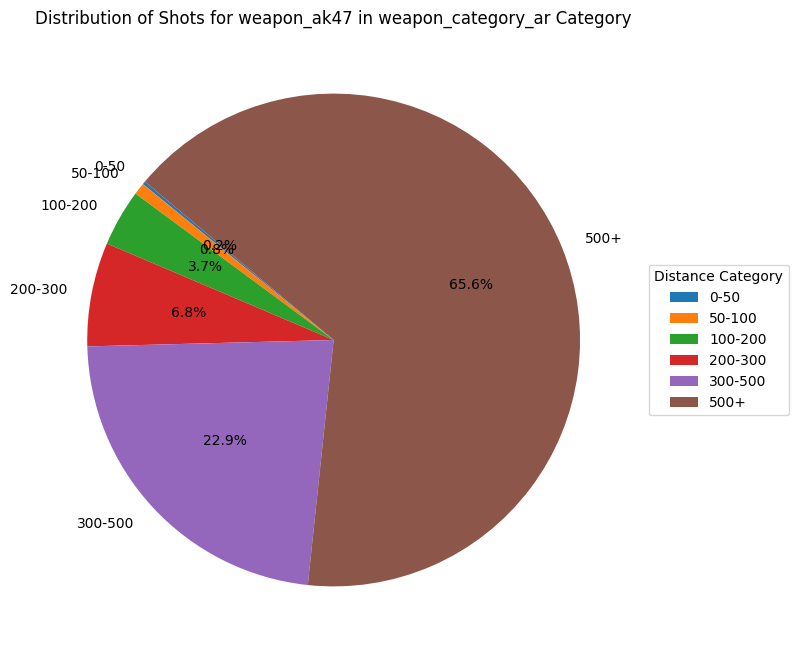

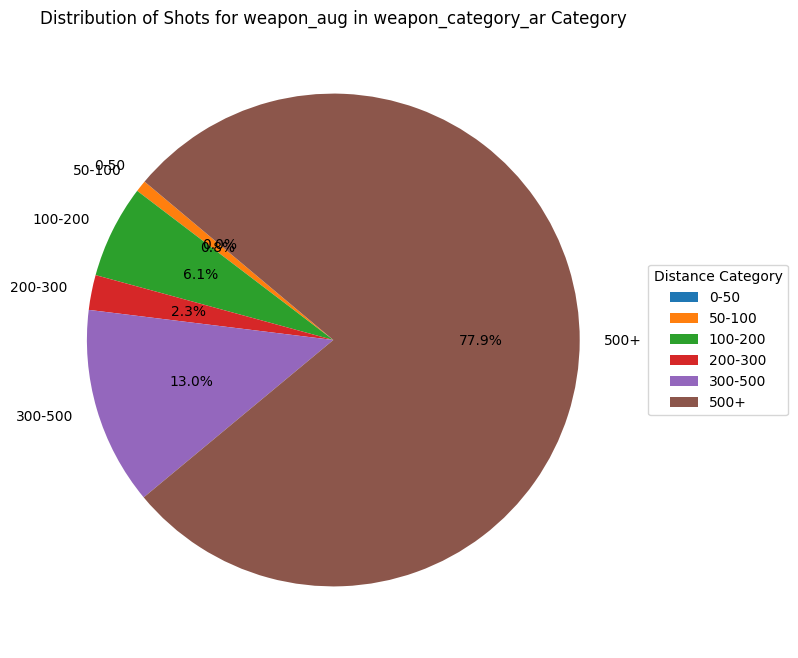

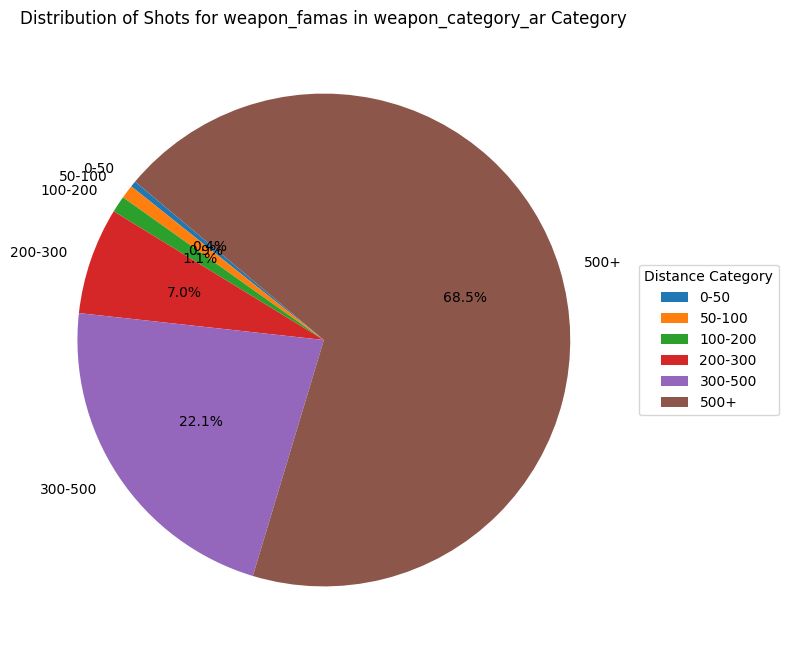

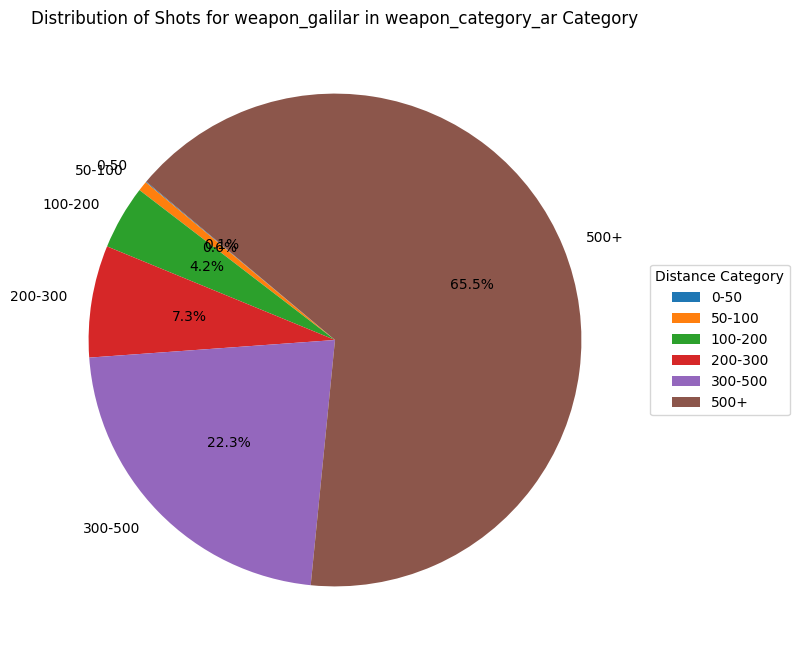

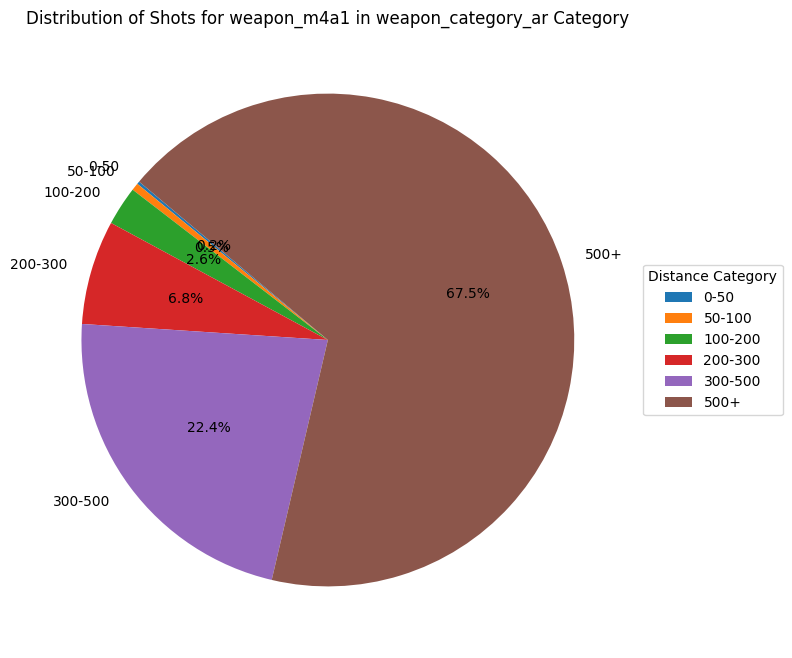

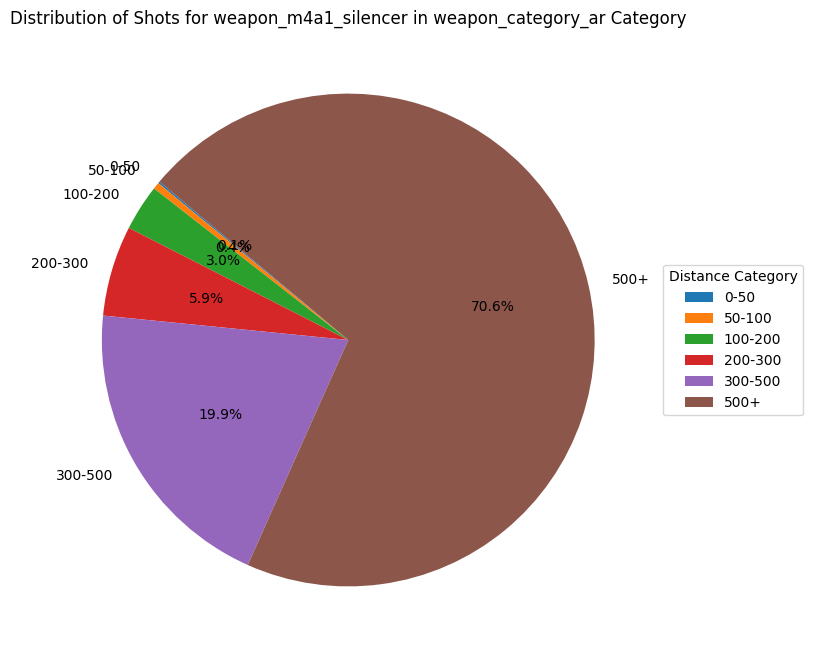

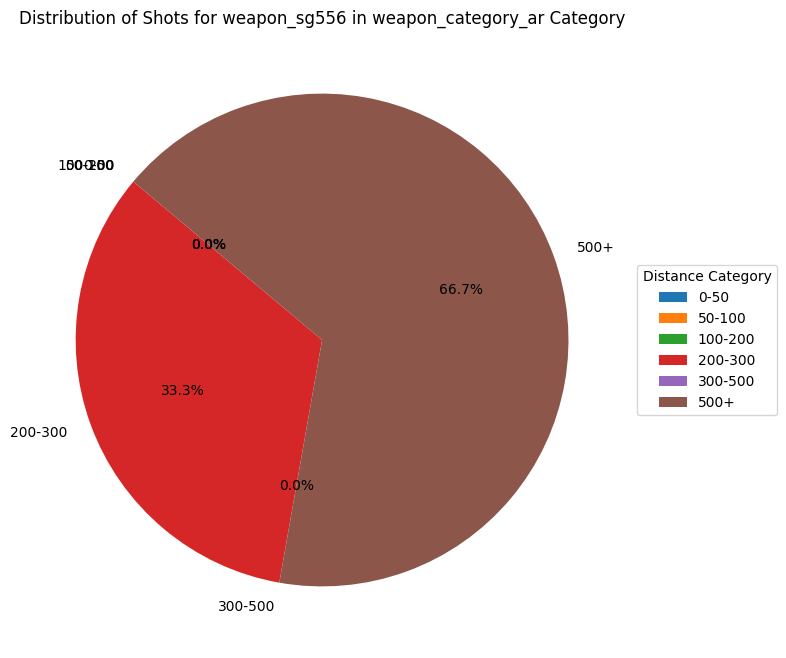

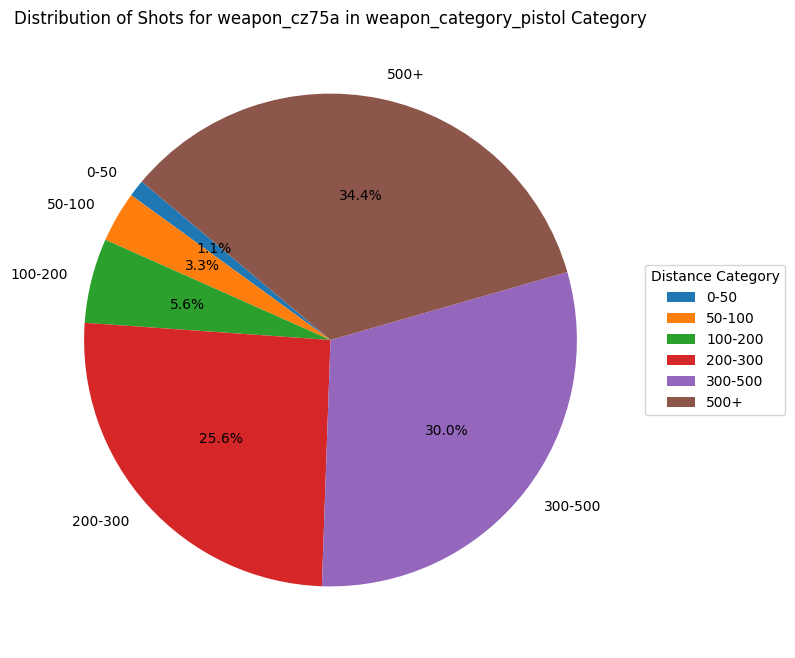

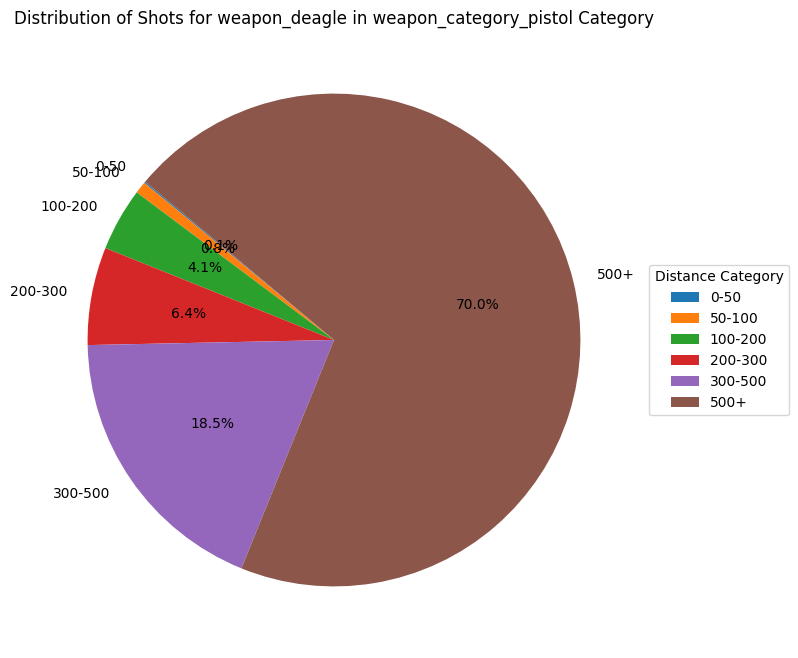

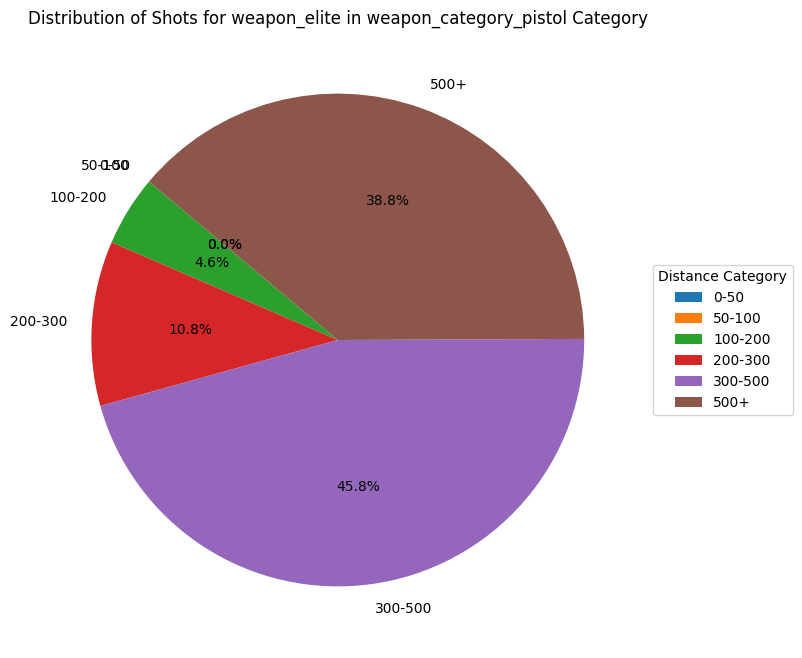

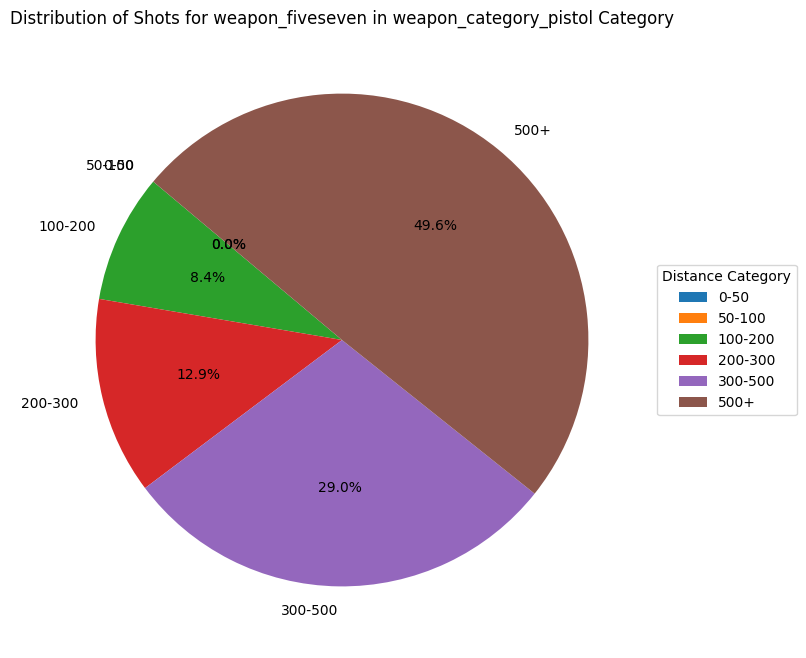

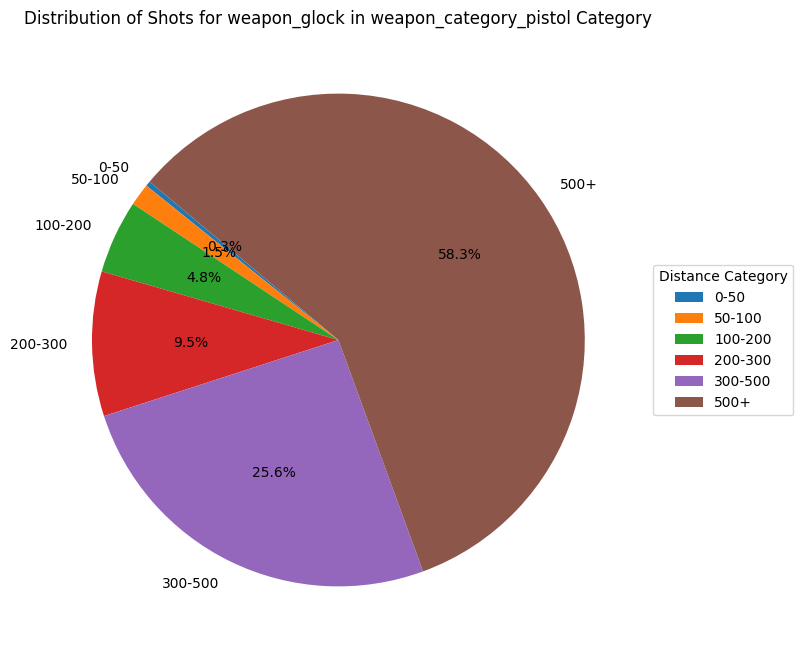

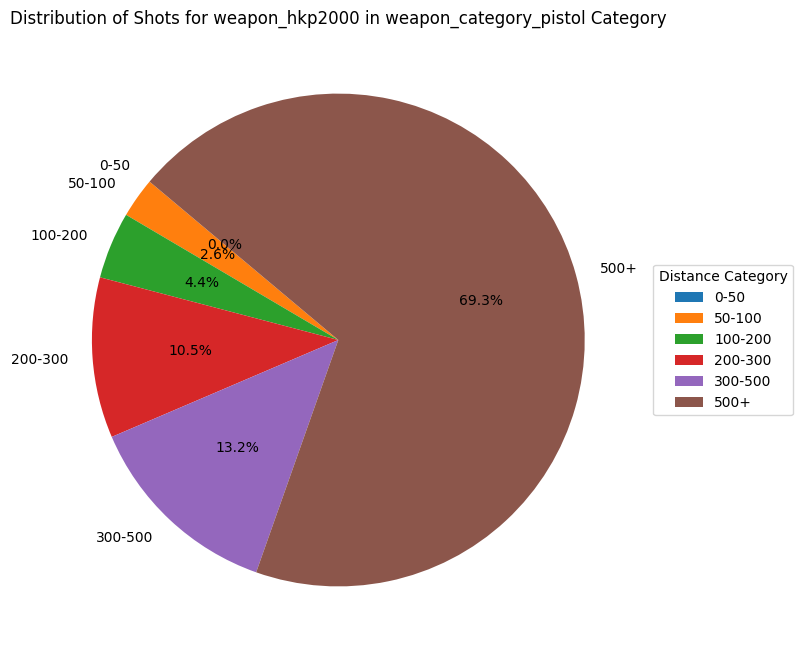

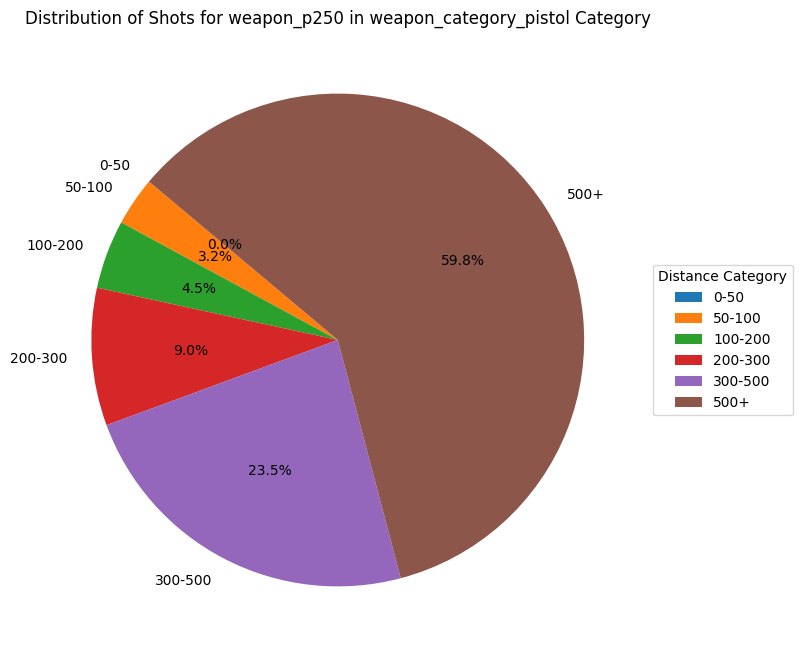

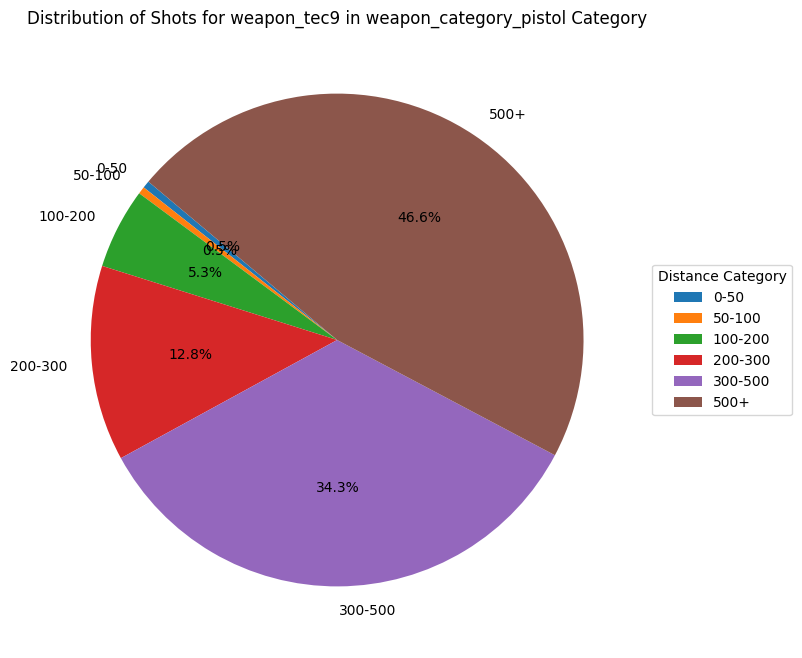

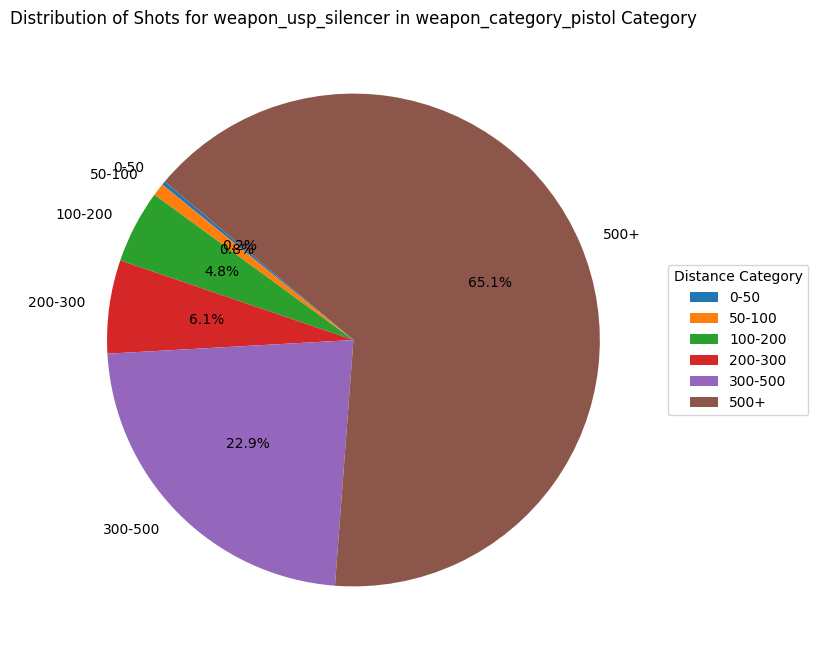

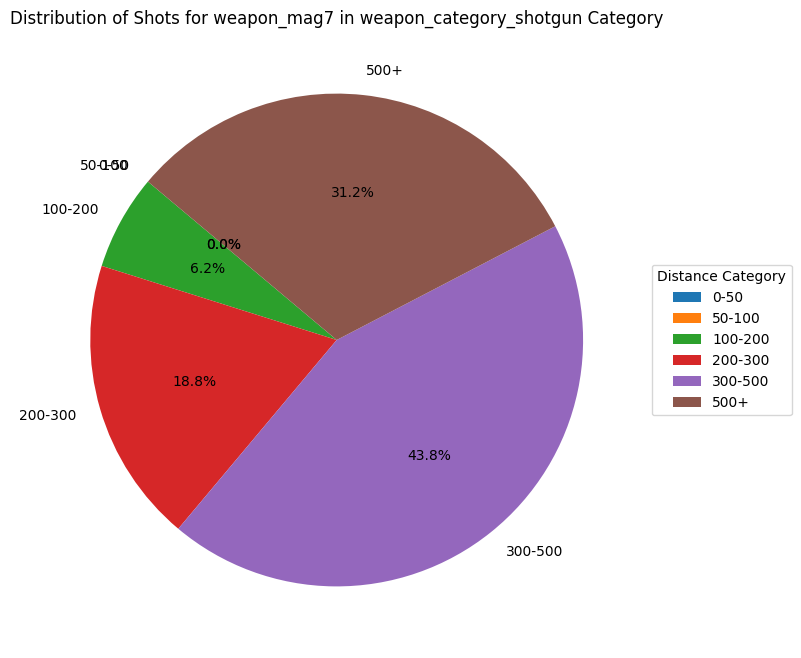

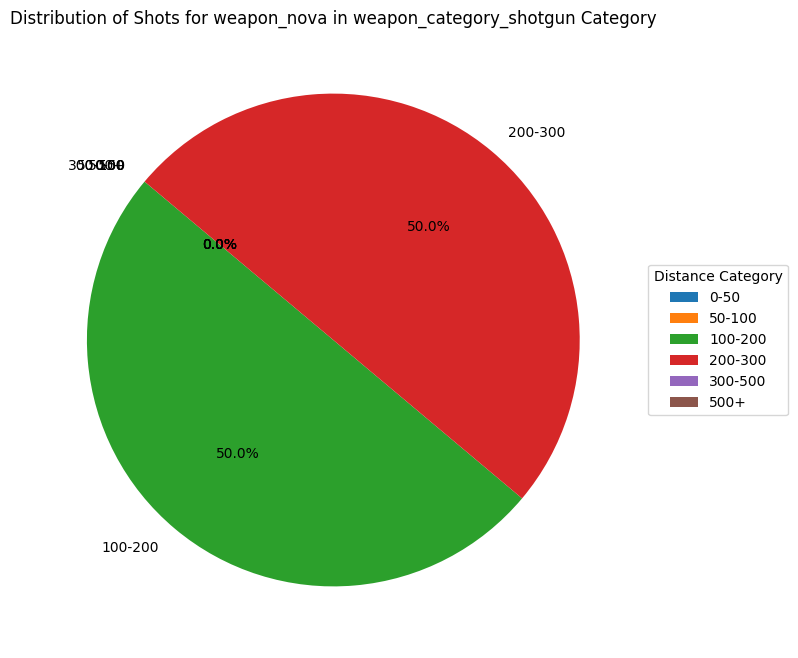

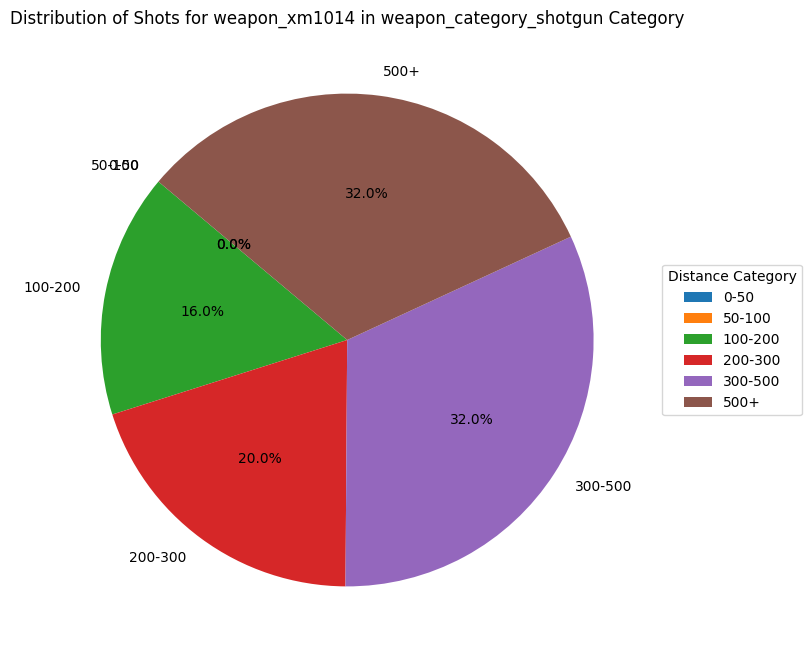

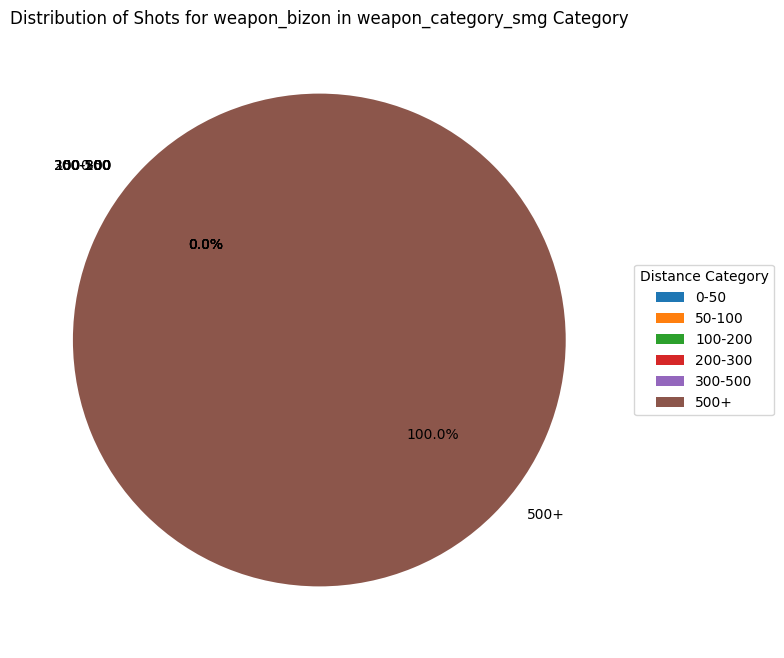

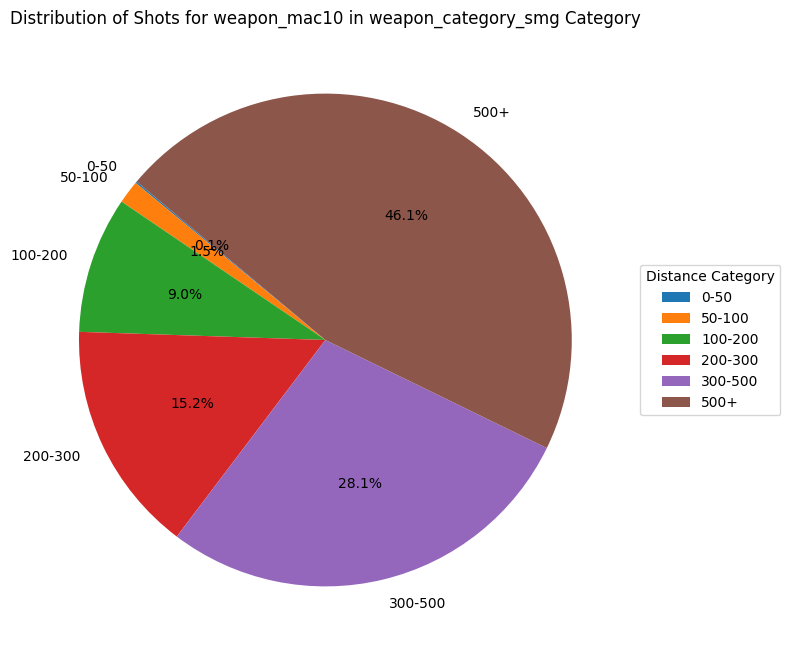

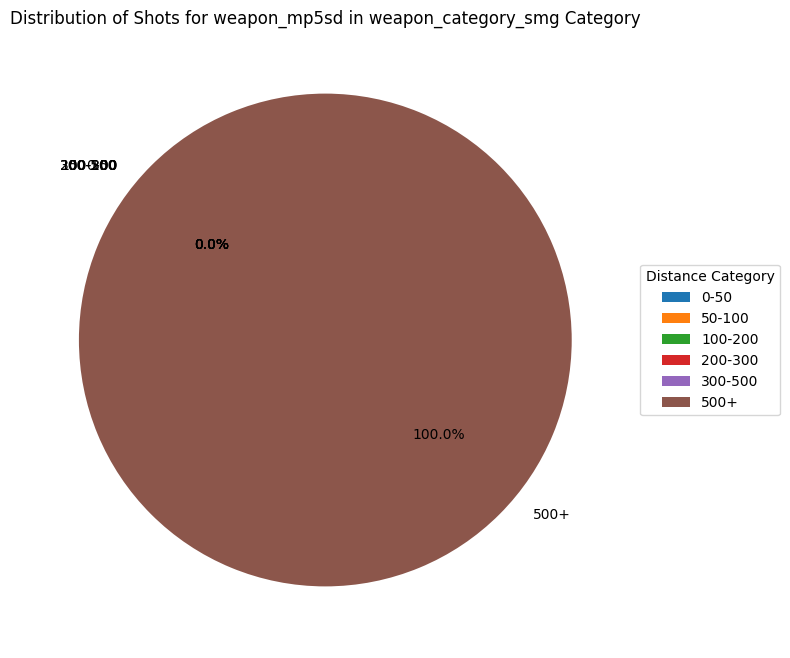

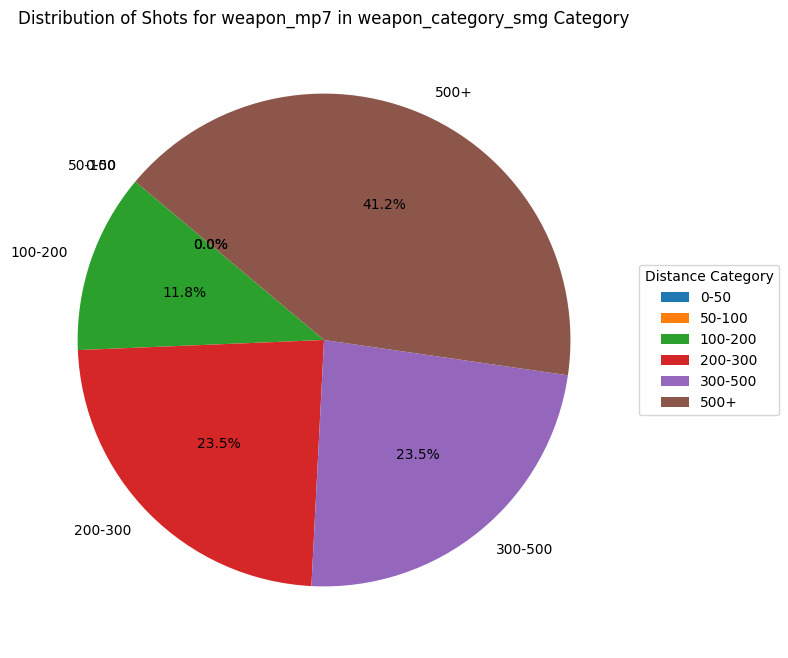

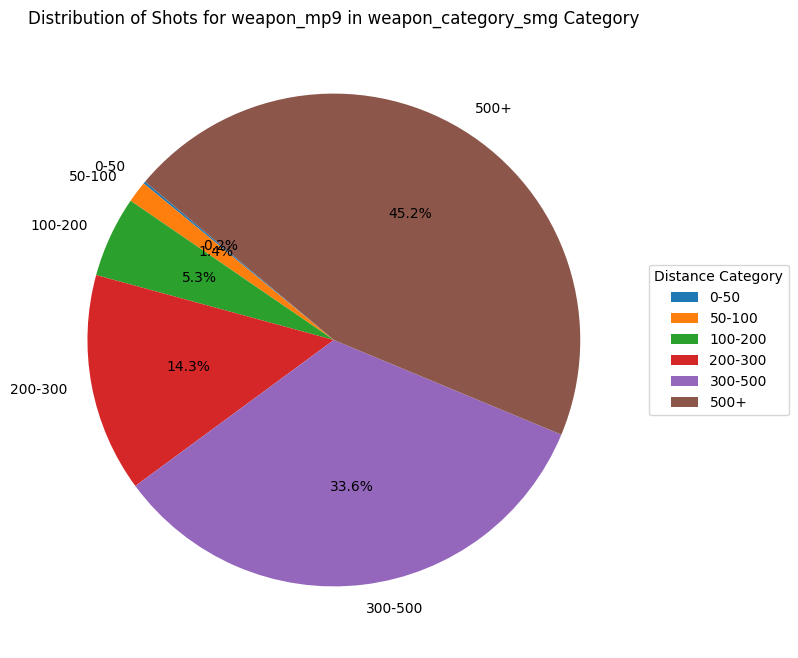

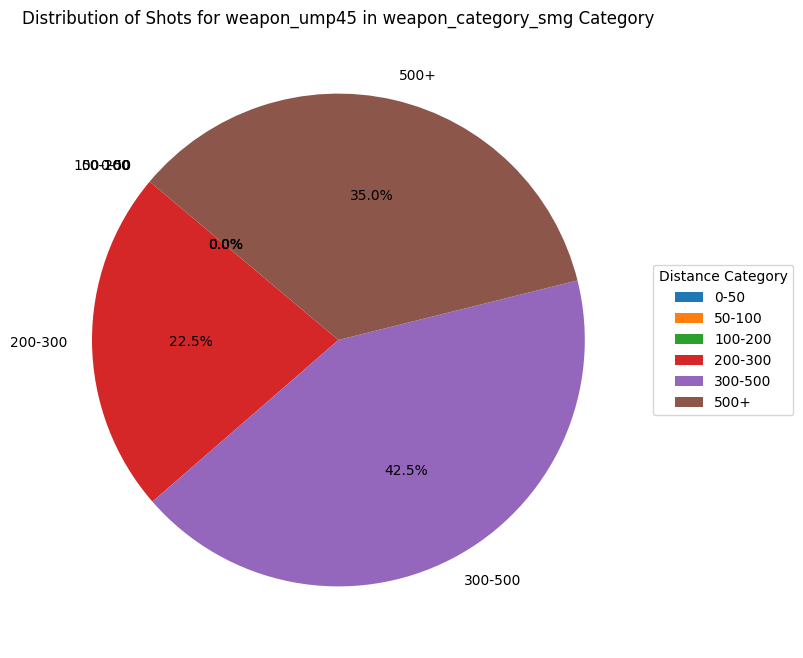

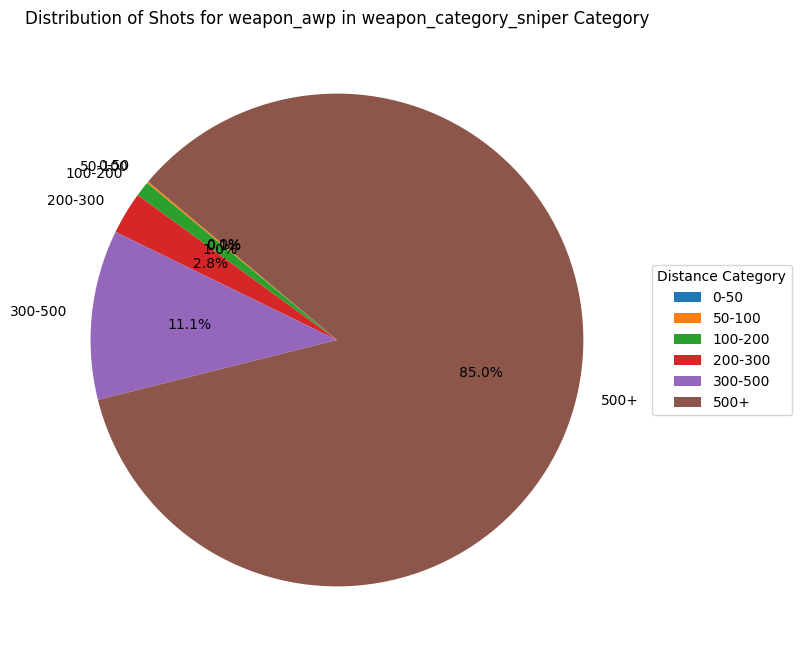

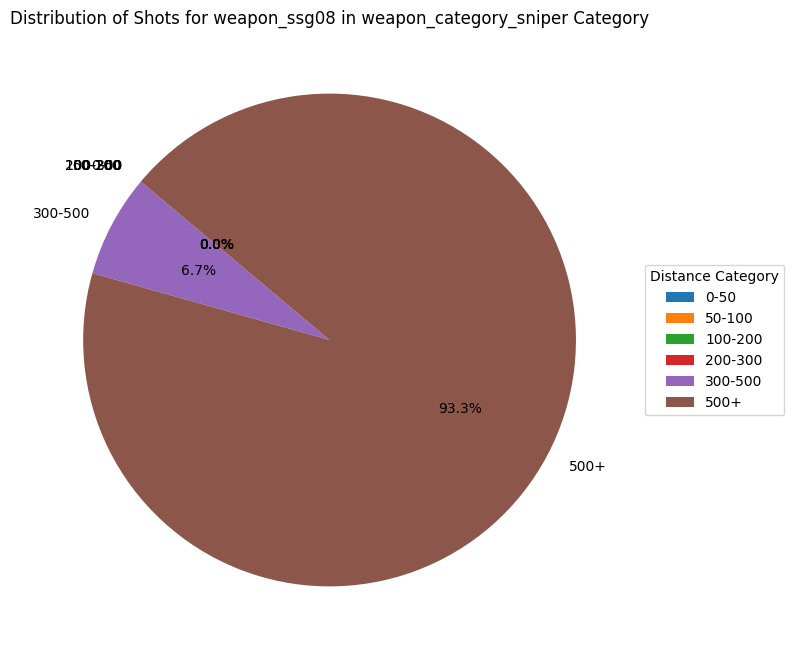

In [5]:
def question5():
    df=pd.read_csv("./professional.csv")    

    distance_columns = ['distToTarget', 'weaponCategory', 'weaponUsed']
    
    
    filtered_data = df[distance_columns].dropna()
    
    distance_bins = [0, 50, 100, 200, 300, 500, float('inf')]
    distance_labels = ['0-50', '50-100', '100-200', '200-300', '300-500', '500+']
    
    filtered_data['DistanceCategory'] = pd.cut(filtered_data['distToTarget'], bins=distance_bins, labels=distance_labels, right=False)
    
    grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')
    
    grouped_data = grouped_data.sort_values(['weaponCategory', 'weaponUsed', 'DistanceCategory'])
    
    unique_weapon_categories = grouped_data['weaponCategory'].unique()
    
    for category in unique_weapon_categories:
        category_data = grouped_data[grouped_data['weaponCategory'] == category]
        
        unique_weapons_in_category = category_data['weaponUsed'].unique()
        
        for weapon in unique_weapons_in_category:
            weapon_data = category_data[category_data['weaponUsed'] == weapon]
            
            if weapon_data['Count'].sum() != 0:
                plt.figure(figsize=(8, 8))
                plt.pie(weapon_data['Count'], labels=weapon_data['DistanceCategory'], autopct='%1.1f%%', startangle=140)
                plt.title(f'Distribution of Shots for {weapon} in {category} Category')
                
                
                plt.legend(weapon_data['DistanceCategory'], title='Distance Category', loc='center left', bbox_to_anchor=(1, 0.5))
                
                plt.show()

question5()

## Cheating dataset

C:\Users\SHUBHAM SUKUM\AppData\Local\Temp\ipykernel_2528\3058902527.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')


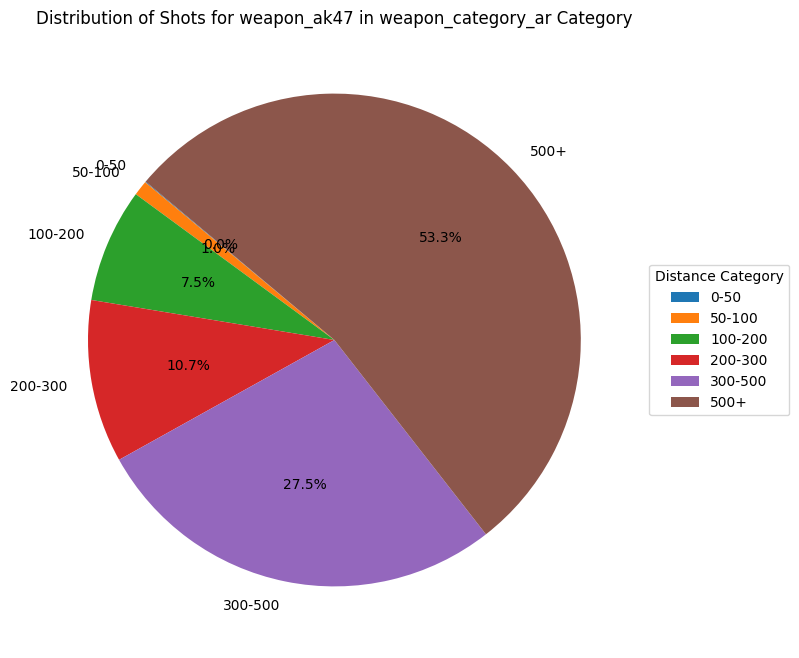

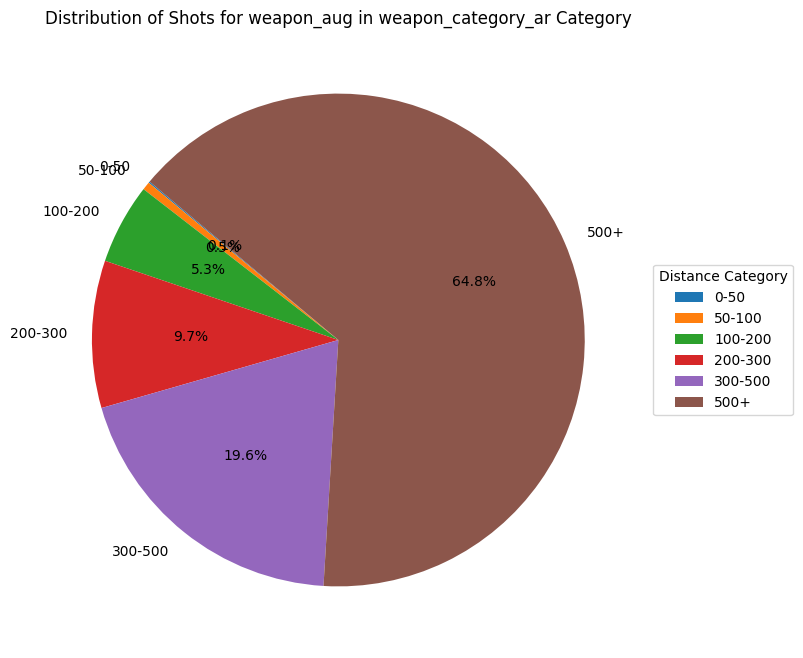

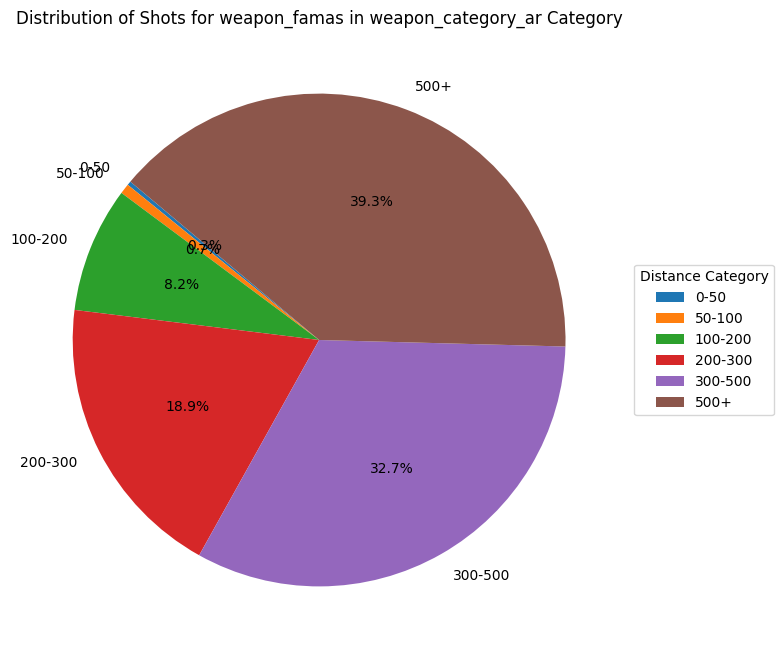

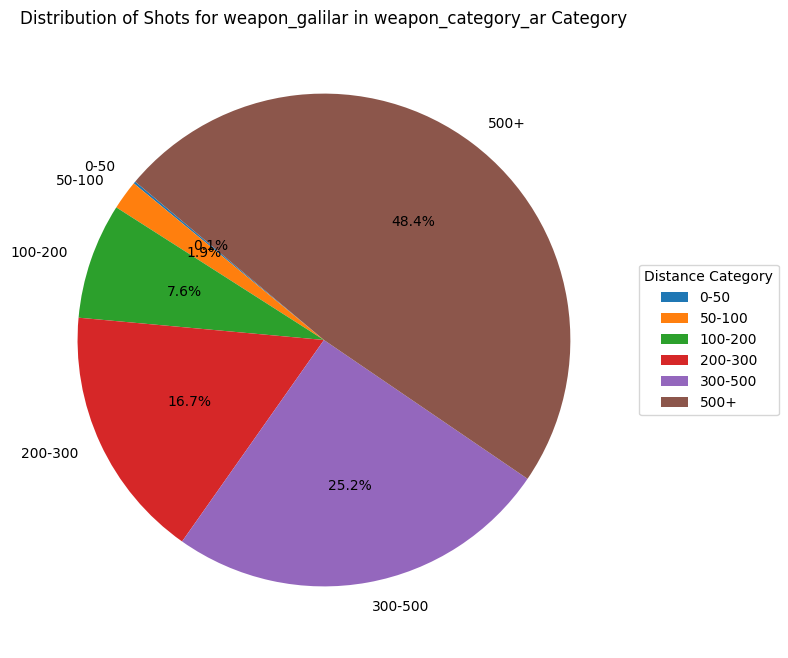

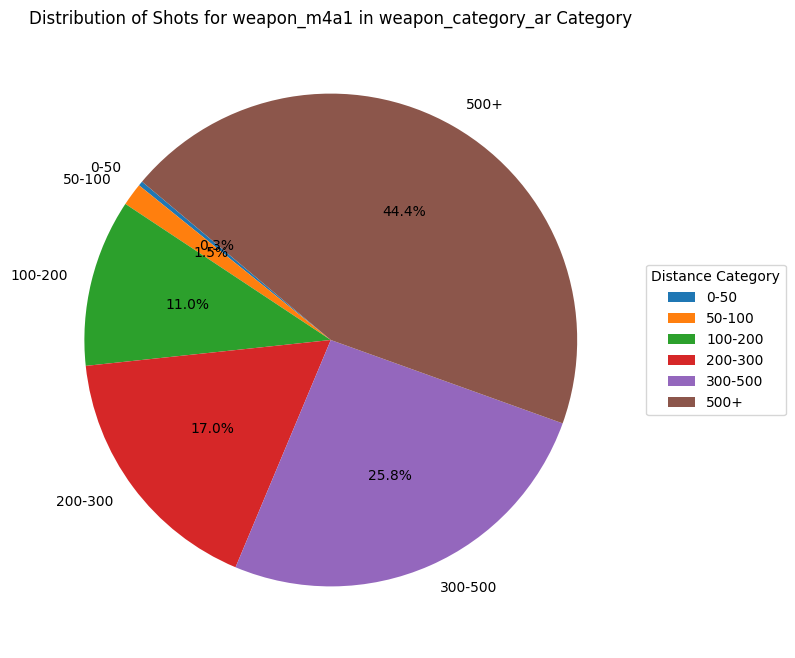

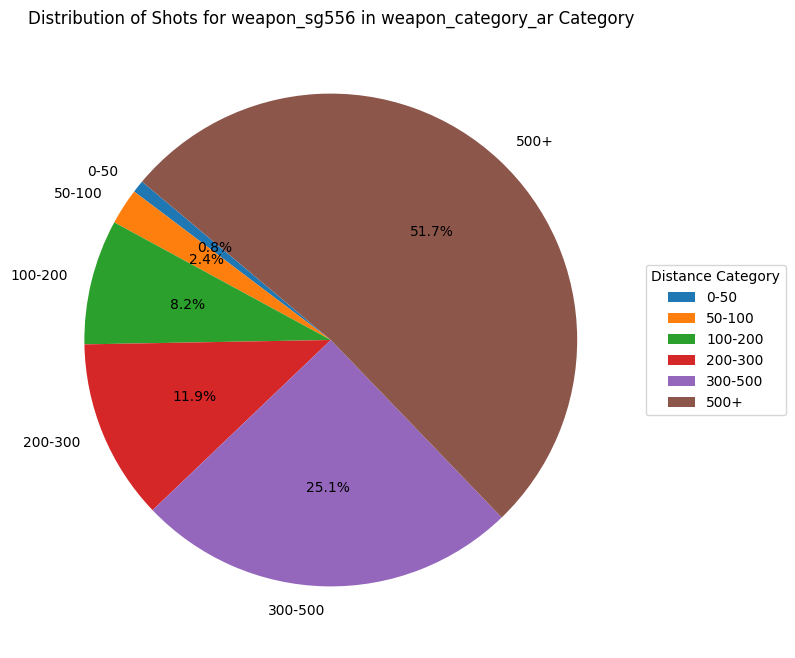

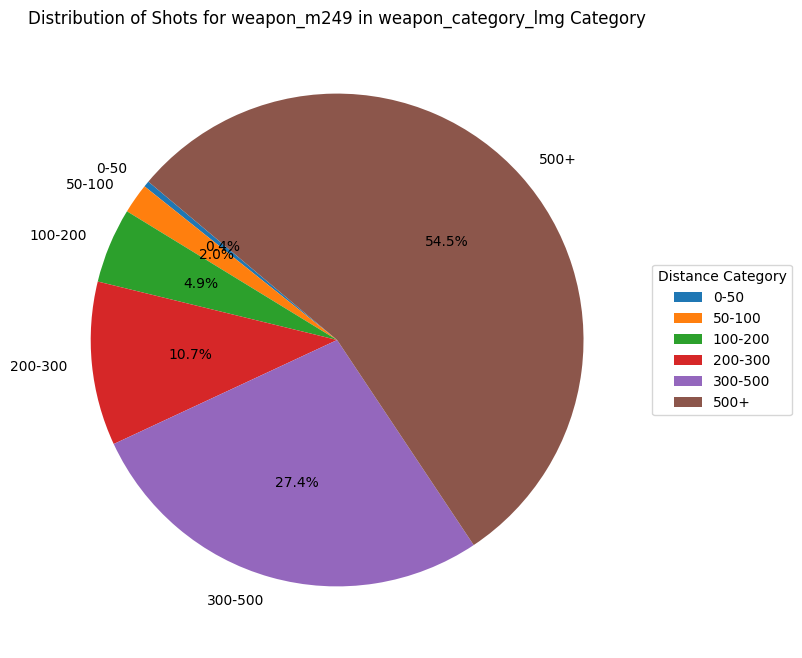

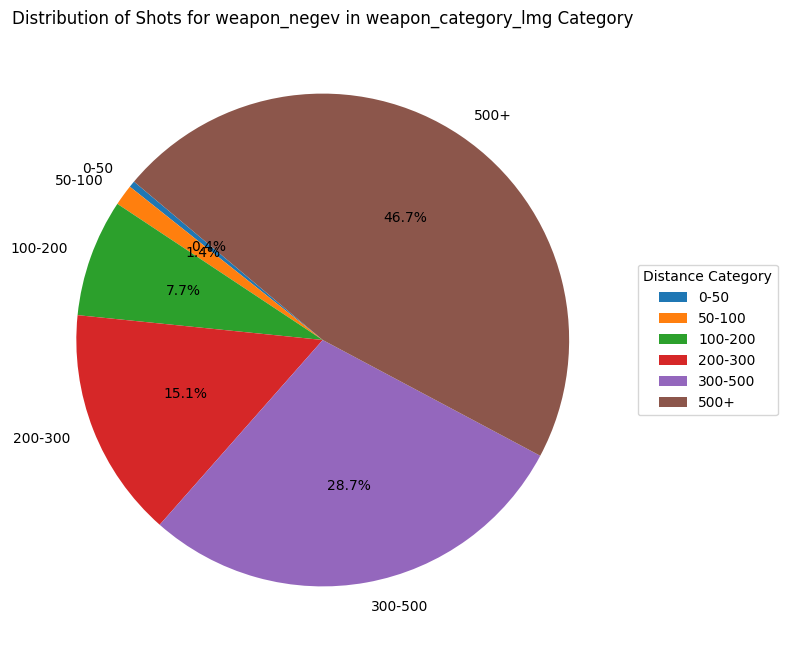

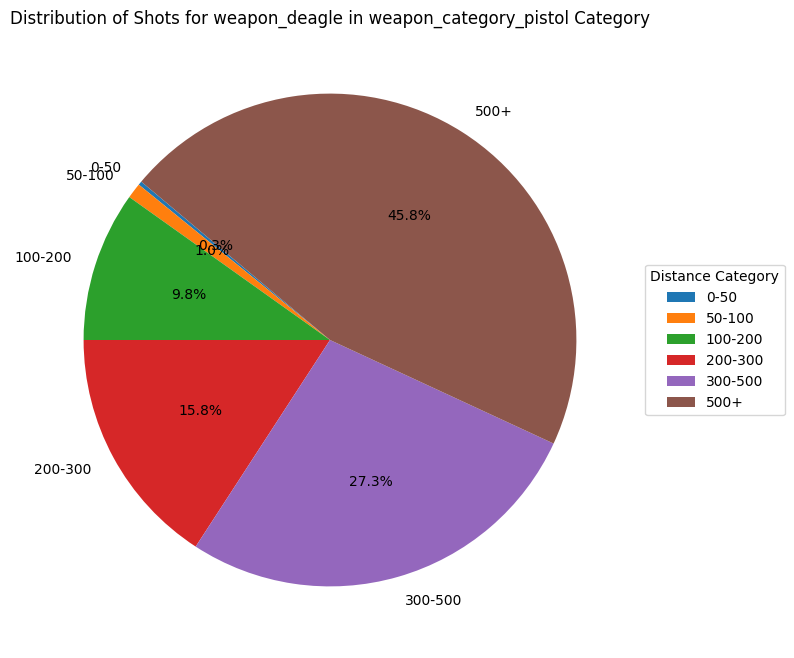

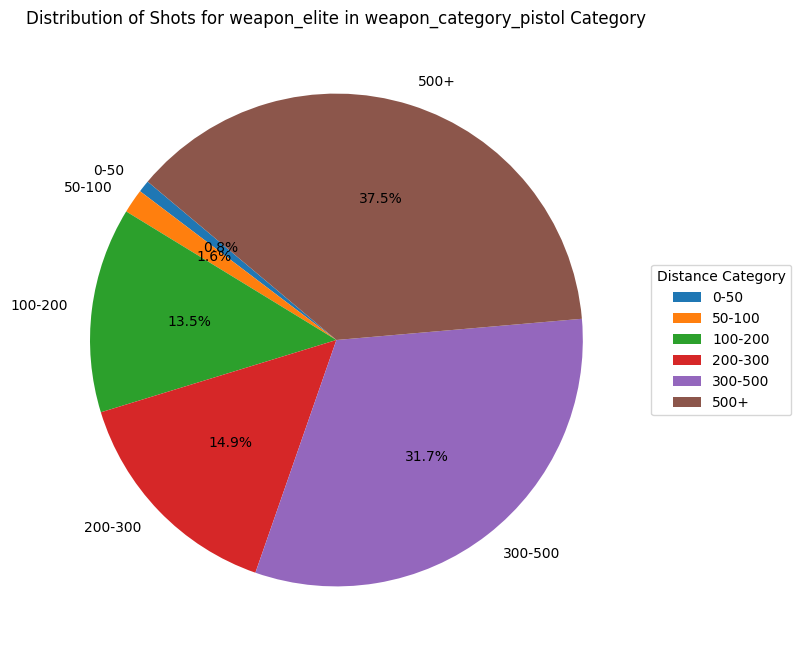

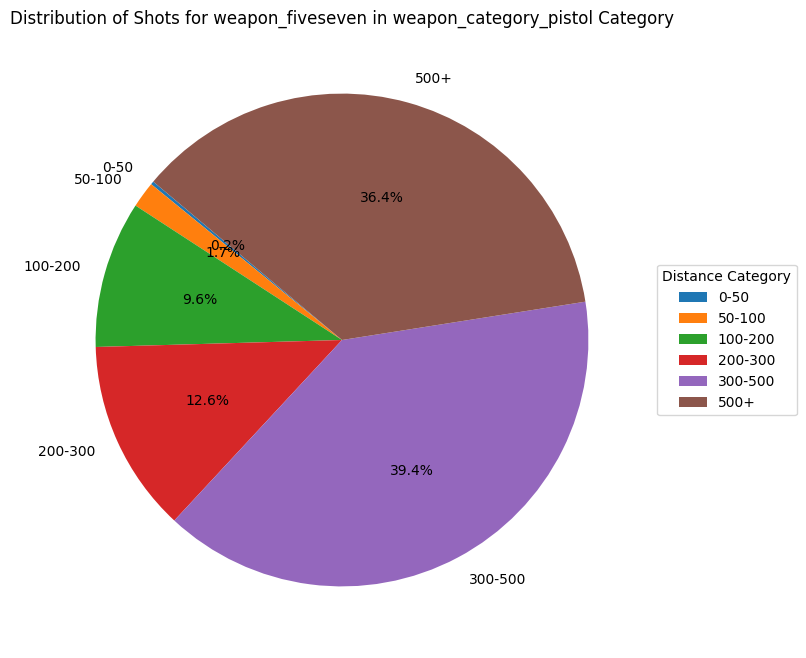

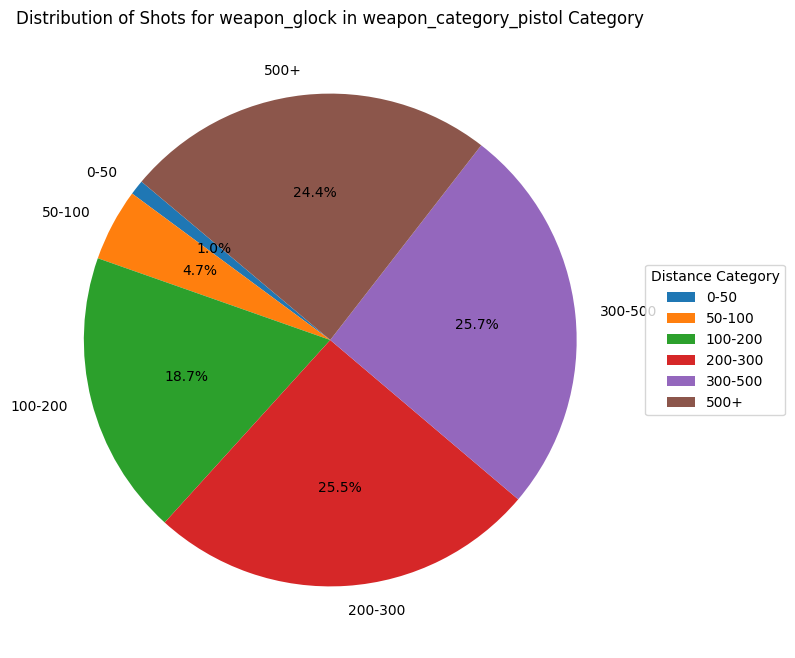

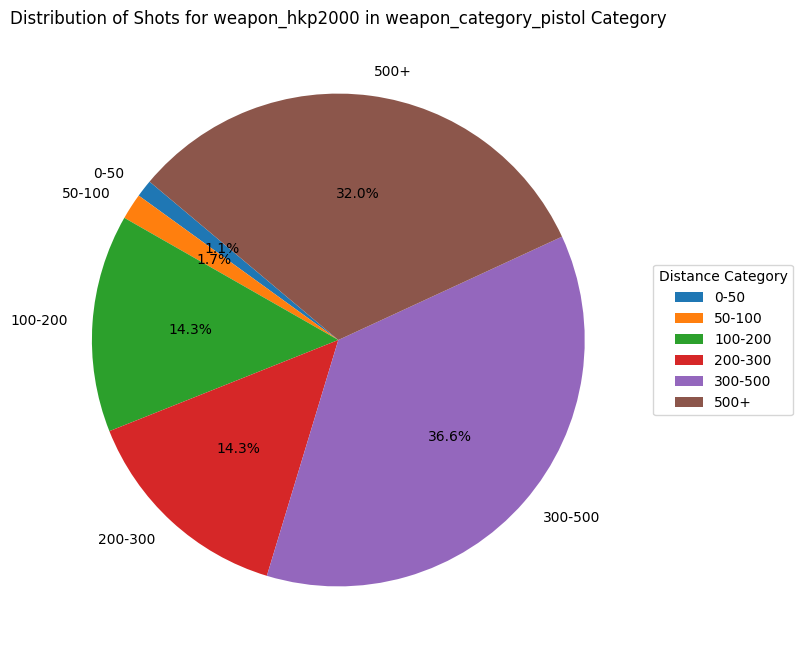

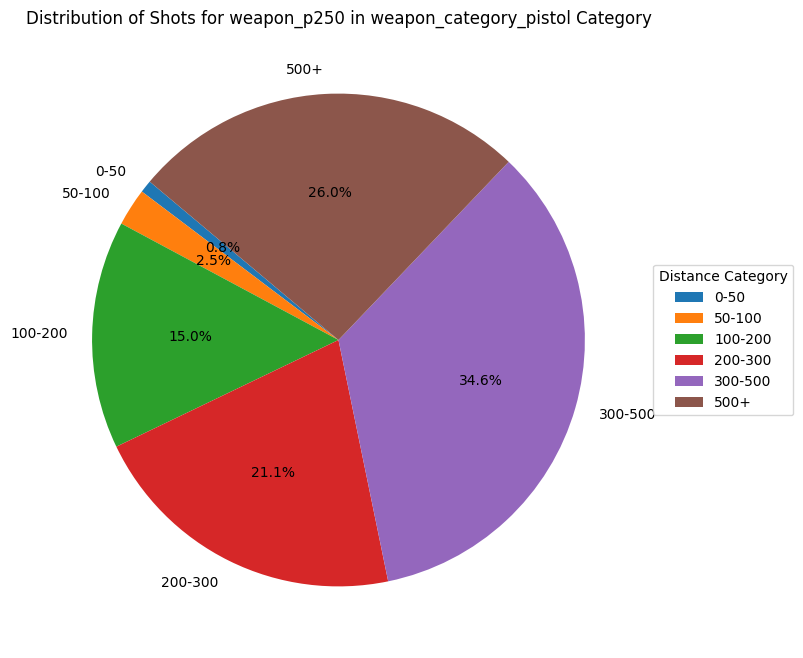

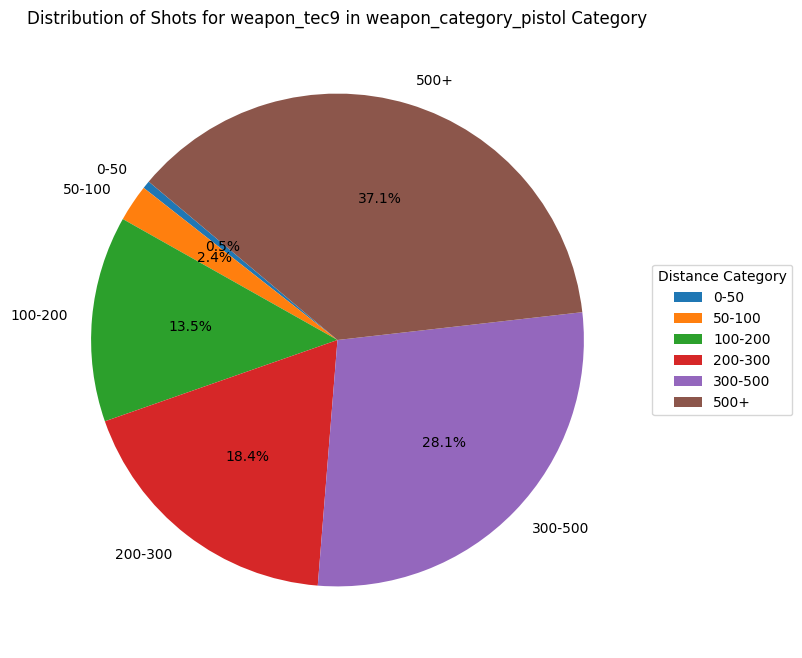

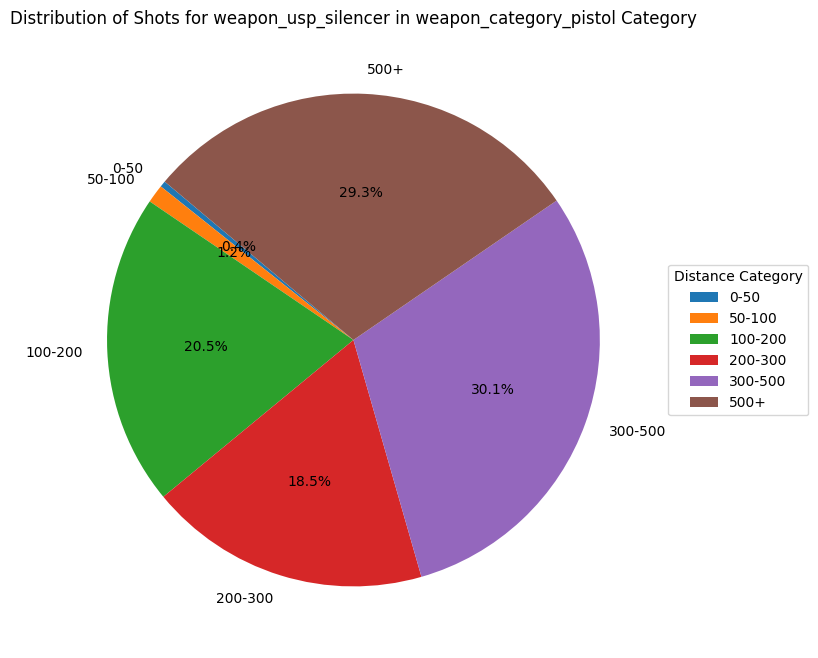

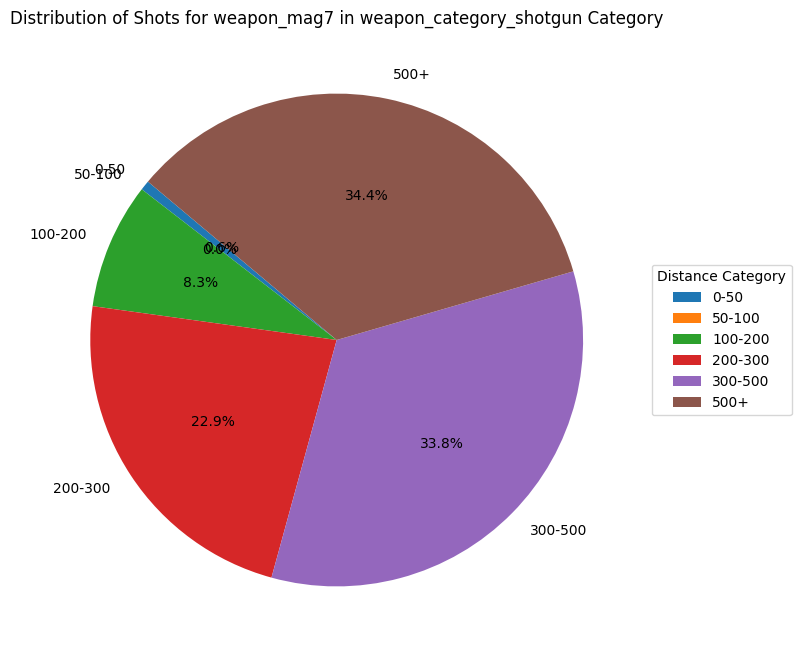

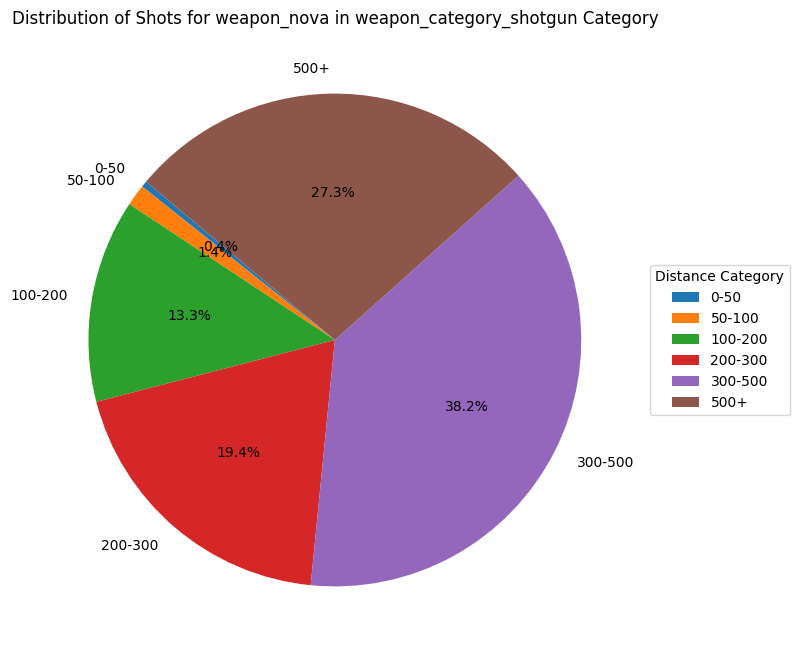

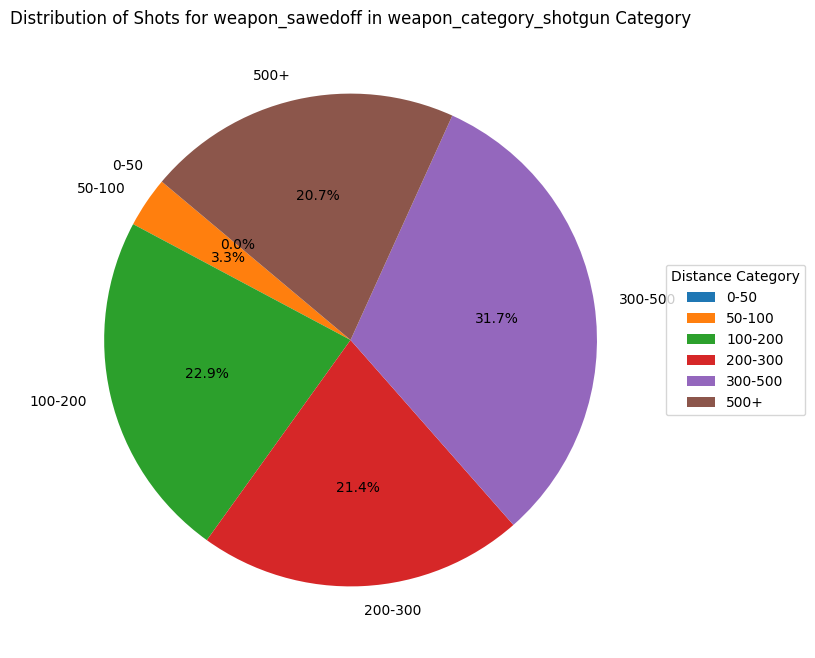

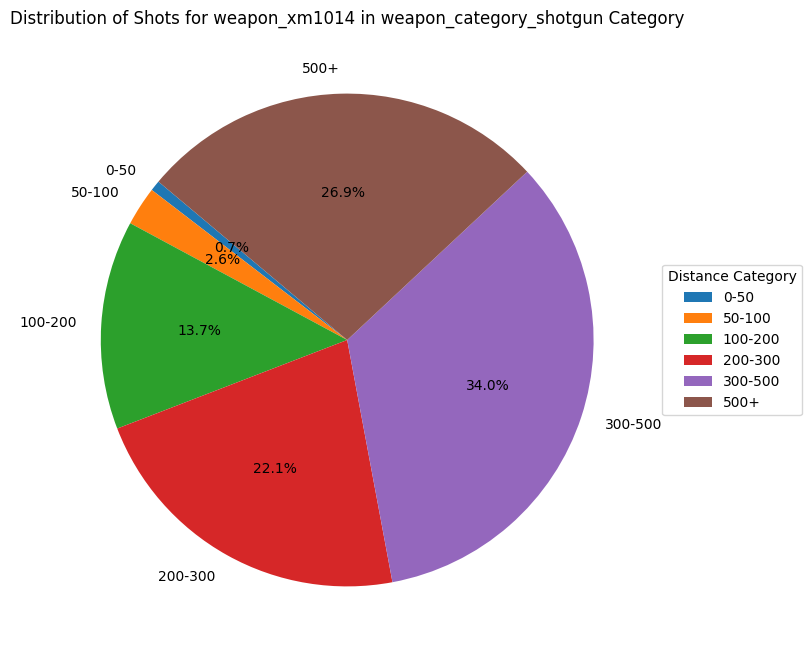

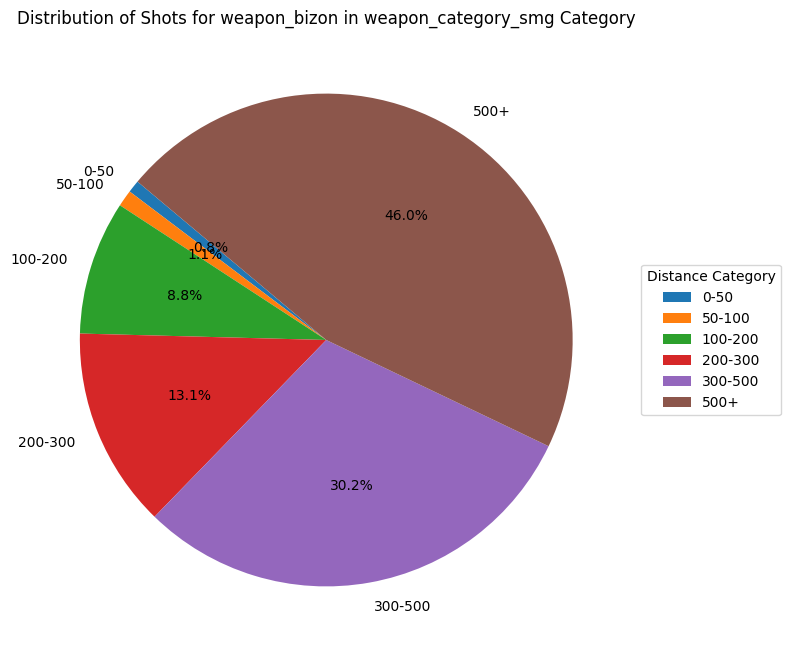

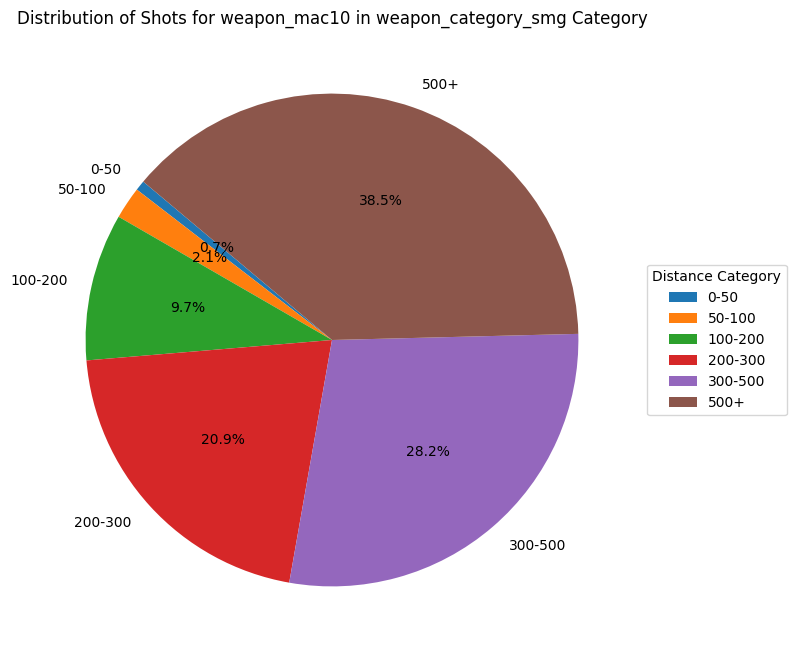

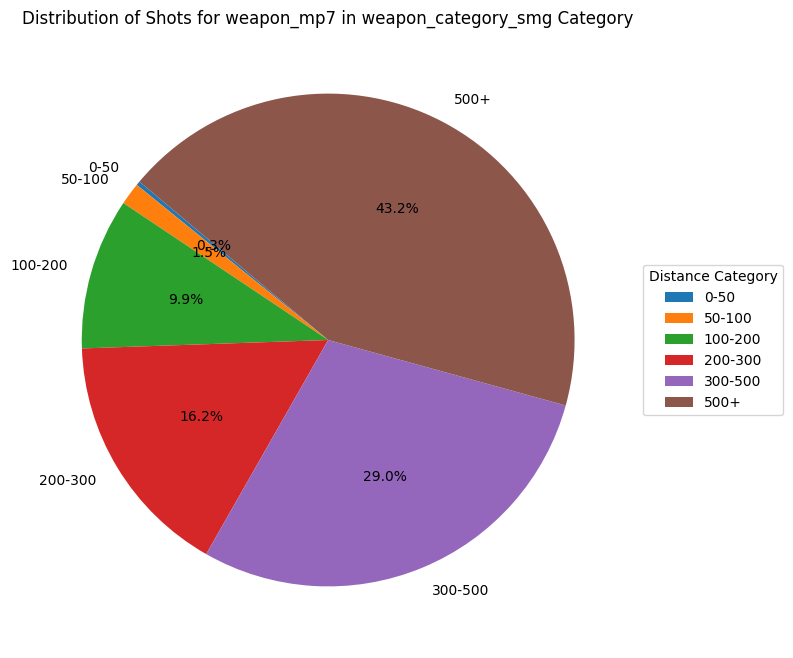

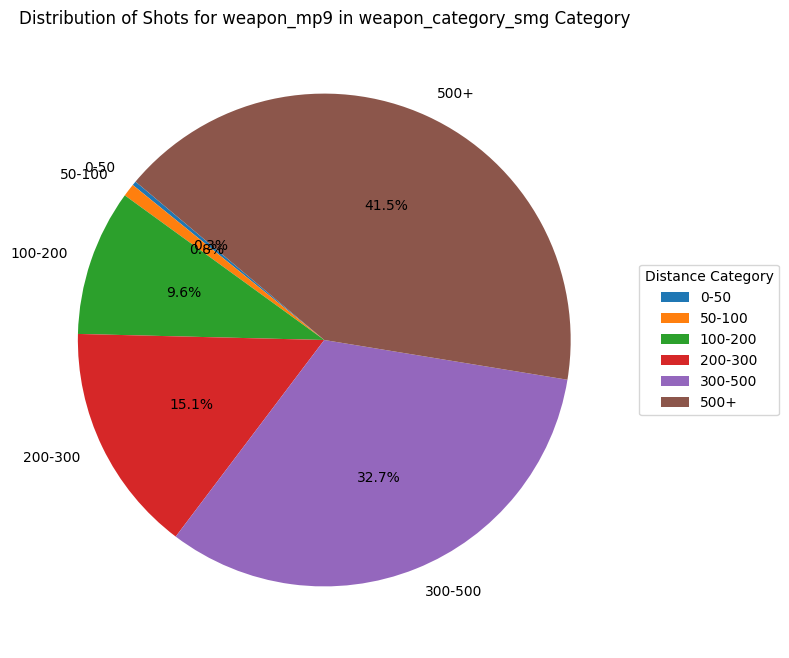

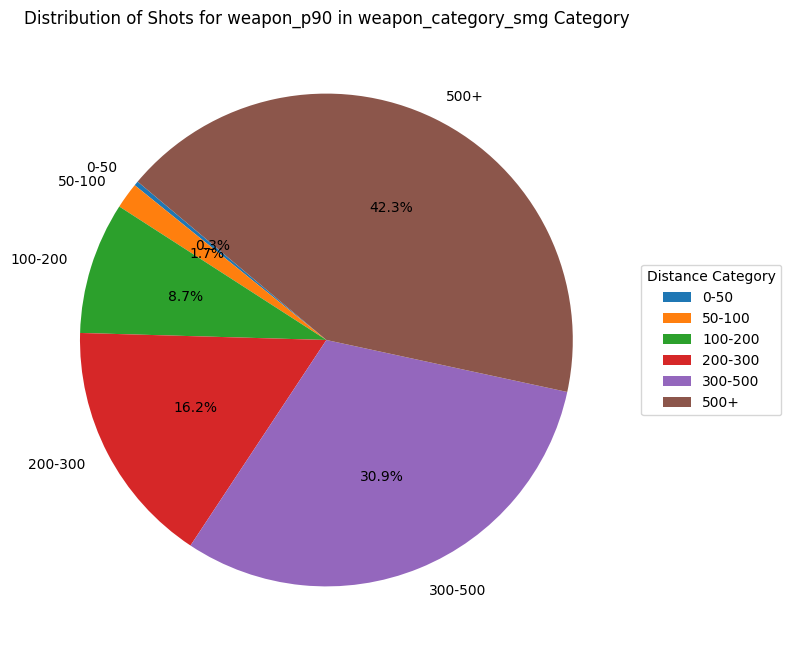

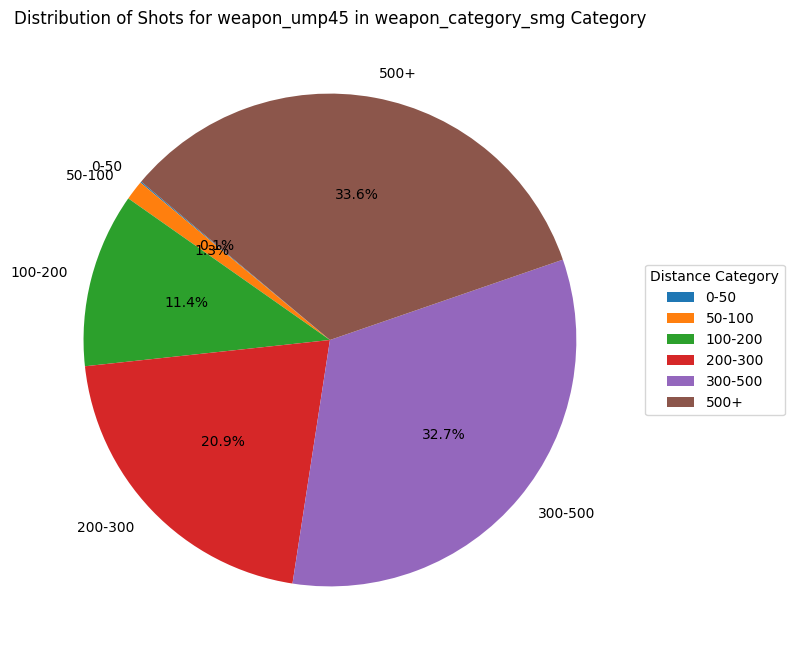

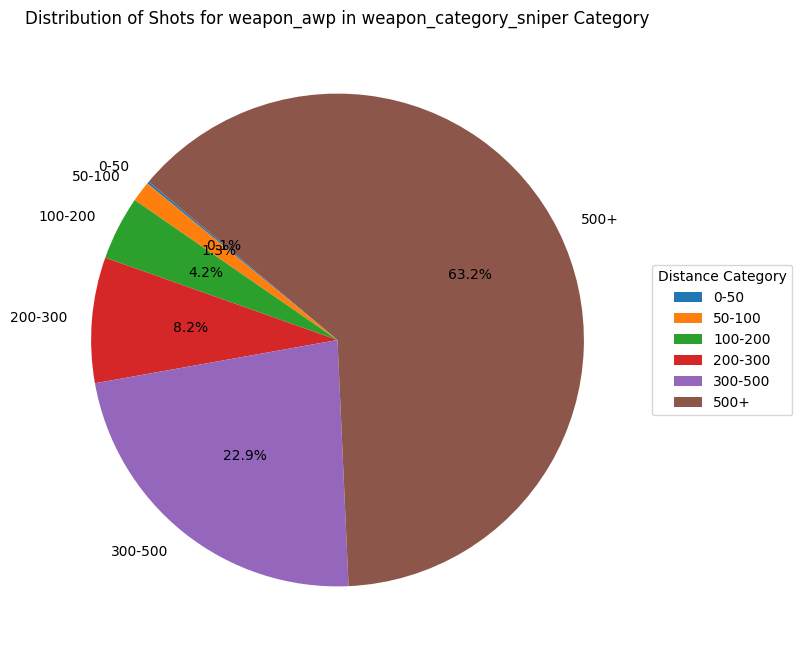

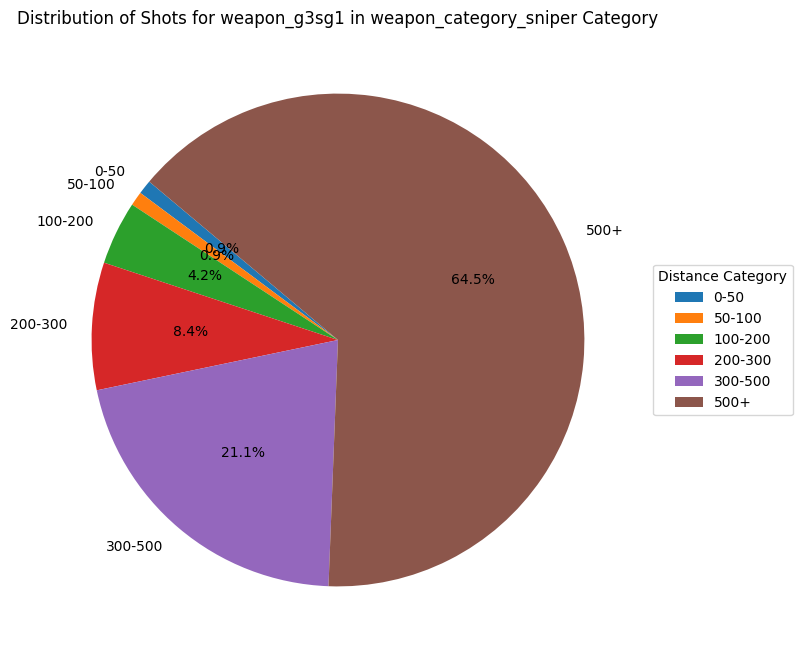

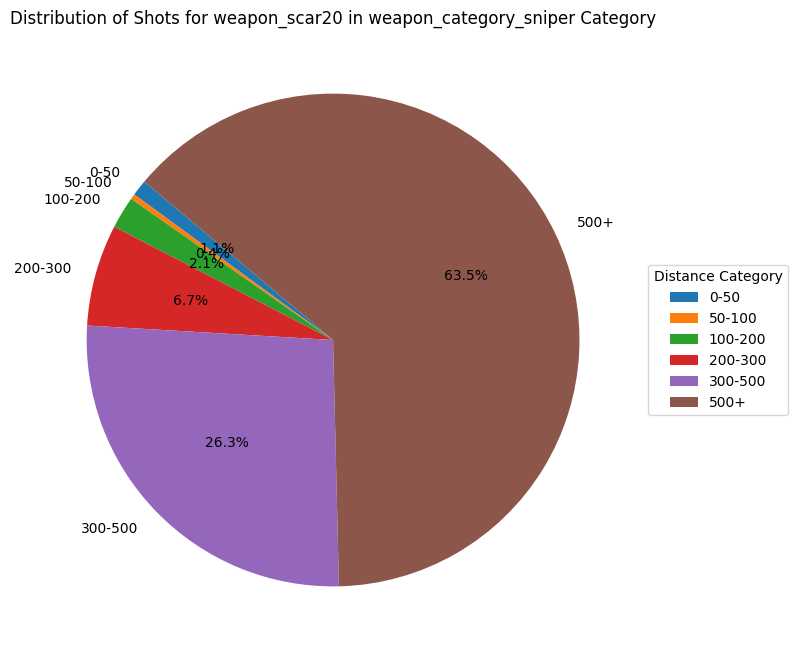

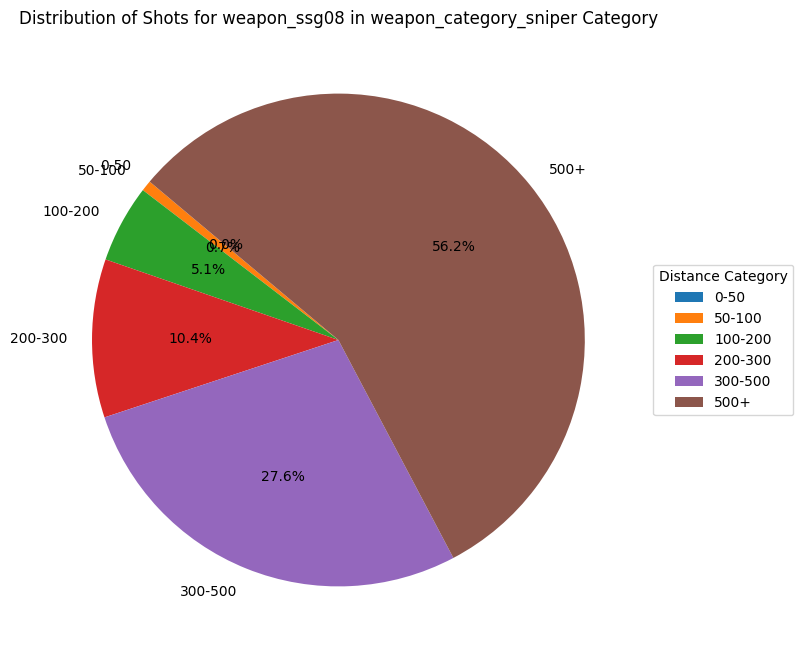

In [6]:
def question5():
    df=pd.read_csv("./cheating.csv")    

    distance_columns = ['distToTarget', 'weaponCategory', 'weaponUsed']
    
    
    filtered_data = df[distance_columns].dropna()
    
    distance_bins = [0, 50, 100, 200, 300, 500, float('inf')]
    distance_labels = ['0-50', '50-100', '100-200', '200-300', '300-500', '500+']
    
    filtered_data['DistanceCategory'] = pd.cut(filtered_data['distToTarget'], bins=distance_bins, labels=distance_labels, right=False)
    
    grouped_data = filtered_data.groupby(['weaponCategory', 'weaponUsed', 'DistanceCategory']).size().reset_index(name='Count')
    
    grouped_data = grouped_data.sort_values(['weaponCategory', 'weaponUsed', 'DistanceCategory'])
    
    unique_weapon_categories = grouped_data['weaponCategory'].unique()
    
    for category in unique_weapon_categories:
        category_data = grouped_data[grouped_data['weaponCategory'] == category]
        
        unique_weapons_in_category = category_data['weaponUsed'].unique()
        
        for weapon in unique_weapons_in_category:
            weapon_data = category_data[category_data['weaponUsed'] == weapon]
            
            if weapon_data['Count'].sum() != 0:
                plt.figure(figsize=(8, 8))
                plt.pie(weapon_data['Count'], labels=weapon_data['DistanceCategory'], autopct='%1.1f%%', startangle=140)
                plt.title(f'Distribution of Shots for {weapon} in {category} Category')
                
                
                plt.legend(weapon_data['DistanceCategory'], title='Distance Category', loc='center left', bbox_to_anchor=(1, 0.5))
                
                plt.show()

question5()

# Q4) What movement type players prefer when they are fighting? (no movement, jumping, crouching)? When a shot is registered i.e. weapon fired and shot hit target, take the players movement type and store it as count in above 3 categories. Show in piechart. Relevant features isCrouching, isJumping.

## Professional dataset

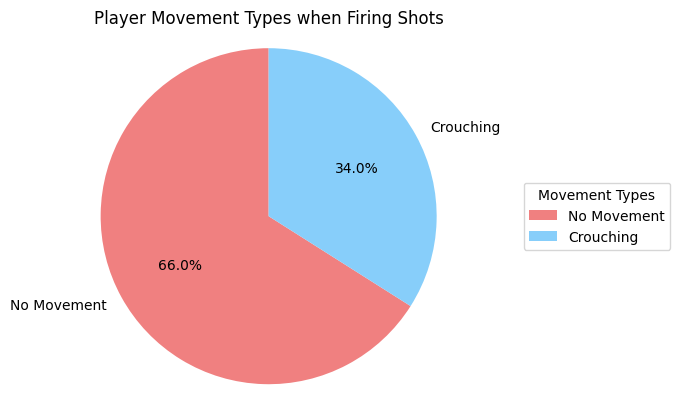

In [8]:
def question4():
    df=pd.read_csv("./professional.csv")

    def analyze_movement_types(dataframe):
        
        
        filtered_data = dataframe
    
        crouching_count = filtered_data['isCrouching'].sum() if 'isCrouching' in filtered_data else 0
        jumping_count = filtered_data['isJumping'].sum() if 'isJumping' in filtered_data else 0
        no_movement_count = len(filtered_data) - (crouching_count + jumping_count)
    
        return crouching_count, jumping_count, no_movement_count
    
    
    
    crouching_count, jumping_count, no_movement_count = analyze_movement_types(df)
    
    
    labels = []
    sizes = []
    
    if crouching_count > 0:
        labels.append('Crouching')
        sizes.append(crouching_count)
    
    if jumping_count > 0:
        labels.append('Jumping')
        sizes.append(jumping_count)
    
    if no_movement_count > 0:
        labels.append('No Movement')
        sizes.append(no_movement_count)
    
    
    labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))
    
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
    ax.axis('equal')  
    
    ax.legend(labels, title='Movement Types', loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_aspect('equal')
    
    
    plt.title('Player Movement Types when Firing Shots')
    
    
    plt.show()

question4()

## Cheating dataset

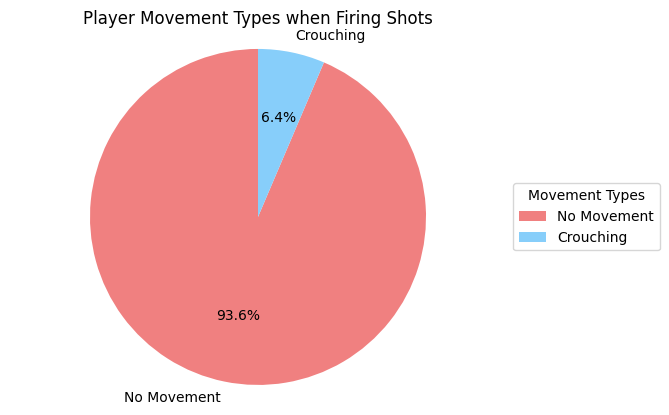

In [9]:
def question4():
    df=pd.read_csv("./cheating.csv")

    def analyze_movement_types(dataframe):
        
        
        filtered_data = dataframe
    
        crouching_count = filtered_data['isCrouching'].sum() if 'isCrouching' in filtered_data else 0
        jumping_count = filtered_data['isJumping'].sum() if 'isJumping' in filtered_data else 0
        no_movement_count = len(filtered_data) - (crouching_count + jumping_count)
    
        return crouching_count, jumping_count, no_movement_count
    
    
    
    crouching_count, jumping_count, no_movement_count = analyze_movement_types(df)
    
    
    labels = []
    sizes = []
    
    if crouching_count > 0:
        labels.append('Crouching')
        sizes.append(crouching_count)
    
    if jumping_count > 0:
        labels.append('Jumping')
        sizes.append(jumping_count)
    
    if no_movement_count > 0:
        labels.append('No Movement')
        sizes.append(no_movement_count)
    
    
    labels, sizes = zip(*sorted(zip(labels, sizes), key=lambda x: x[1], reverse=True))
    
    
    fig, ax = plt.subplots()
    ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue', 'lightgreen'])
    ax.axis('equal')  
    
    ax.legend(labels, title='Movement Types', loc='center left', bbox_to_anchor=(1, 0.5))

    ax.set_aspect('equal')
    
    
    plt.title('Player Movement Types when Firing Shots')
    
    
    plt.show()

question4()

# Q.10) Number of times target player was blind and shot has landed on target player. i.e. weapon fired and shot hit target. To see if targets can't see check if target is flashed. Relevant features - isTargetBlind.

## Professional dataset

Number of times the target player was blind and shot landed on the target: 4464
Number of times the target player was not blind and shot landed on the target: 3294994


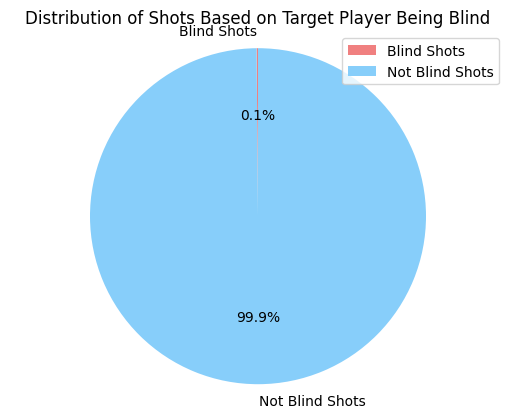

In [11]:
df=pd.read_csv("./professional.csv")

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)

## Cheating dataset

Number of times the target player was blind and shot landed on the target: 124
Number of times the target player was not blind and shot landed on the target: 2006456


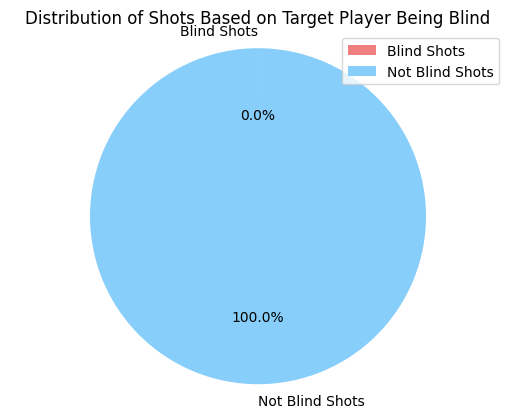

In [12]:
df=pd.read_csv("./cheating.csv")

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)

# Q6) Number of times players could not see the target but the shot has landed on target i.e. weapon fired and shot hit target. To see if player cant see its target check if player is flashed or there is smoke in between player and target. Relevant features - isFlashed, isTargetInSmoke. 

## Professional dataset

Total Shots: 3333465
Obstructed Shots: 275949


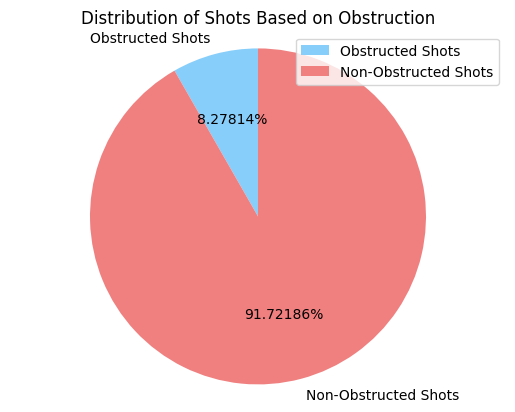

In [13]:
def question6():
    df=pd.read_csv("./professional.csv")

    def count_obstructed_shots(dataframe):
        total_shots = len(dataframe)
    
        dataframe['isFlashed'] = dataframe['isFlashed'].fillna(False)
        dataframe['isTargetInSmoke'] = dataframe['isTargetInSmoke'].fillna(False)
    
        obstructed_shots = len(dataframe[(dataframe['isFlashed'].astype(bool) | dataframe['isTargetInSmoke'].astype(bool))])
    
        return total_shots, obstructed_shots
    
    total_shots, obstructed_shots = count_obstructed_shots(df)
    
    print(f"Total Shots: {total_shots}")
    print(f"Obstructed Shots: {obstructed_shots}")
    
  
    labels = ['Obstructed Shots', 'Non-Obstructed Shots']
    sizes = [obstructed_shots, total_shots - obstructed_shots]
    
    plt.pie(sizes, labels=labels, autopct='%1.5f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
    plt.axis('equal') 
    
    plt.title('Distribution of Shots Based on Obstruction')
        
    
    plt.legend(labels, loc='upper right')
    
    plt.show()
    
question6()

## Cheating dataset

Total Shots: 2031931
Obstructed Shots: 2459


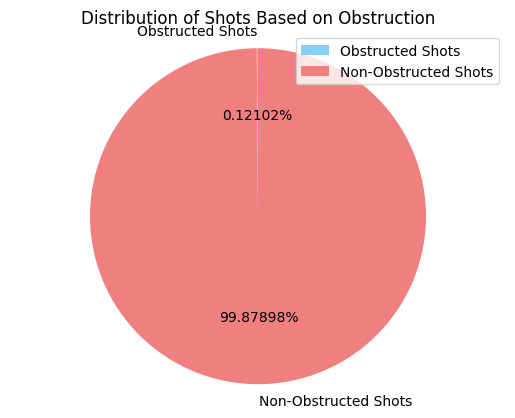

In [14]:
def question6():
    df=pd.read_csv("./cheating.csv")

    def count_obstructed_shots(dataframe):
        total_shots = len(dataframe)
    
        dataframe['isFlashed'] = dataframe['isFlashed'].fillna(False)
        dataframe['isTargetInSmoke'] = dataframe['isTargetInSmoke'].fillna(False)
    
        obstructed_shots = len(dataframe[(dataframe['isFlashed'].astype(bool) | dataframe['isTargetInSmoke'].astype(bool))])
    
        return total_shots, obstructed_shots
    
    total_shots, obstructed_shots = count_obstructed_shots(df)
    
    print(f"Total Shots: {total_shots}")
    print(f"Obstructed Shots: {obstructed_shots}")
    
  
    labels = ['Obstructed Shots', 'Non-Obstructed Shots']
    sizes = [obstructed_shots, total_shots - obstructed_shots]
    
    plt.pie(sizes, labels=labels, autopct='%1.5f%%', startangle=90, colors=['lightskyblue', 'lightcoral'])
    plt.axis('equal') 
    
    plt.title('Distribution of Shots Based on Obstruction')
        
    
    plt.legend(labels, loc='upper right')
    
    plt.show()
    
question6()

# Q8) Average utility uses

## Professional dataset

In [15]:
df=pd.read_csv("./professional.csv")

def question8():

    utility_columns = ['utilityDmgDone', 'supportUtilityUsed']
    
    filtered_data = df[utility_columns].dropna()
    
    
    average_utility_dmg_done = filtered_data['utilityDmgDone'].mean()
    average_support_utility_used = filtered_data['supportUtilityUsed'].mean()
    
    print(f'Average Utility Damage Done: {average_utility_dmg_done}')
    print(f'Average Support Utility Used: {average_support_utility_used}')

question8()

Average Utility Damage Done: 6.597914881100144
Average Support Utility Used: 1.0271412151335106


## Cheating Dataset

In [16]:
df=pd.read_csv("./cheating.csv")

def question8():

    utility_columns = ['utilityDmgDone', 'supportUtilityUsed']
    
    filtered_data = df[utility_columns].dropna()
    
    
    average_utility_dmg_done = filtered_data['utilityDmgDone'].mean()
    average_support_utility_used = filtered_data['supportUtilityUsed'].mean()
    
    print(f'Average Utility Damage Done: {average_utility_dmg_done}')
    print(f'Average Support Utility Used: {average_support_utility_used}')

question8()

Average Utility Damage Done: 2.991967161852953
Average Support Utility Used: 0.04139611759392078


# Q.10)

## Professional dataset

Number of times the target player was blind and shot landed on the target: 4464
Number of times the target player was not blind and shot landed on the target: 3294994


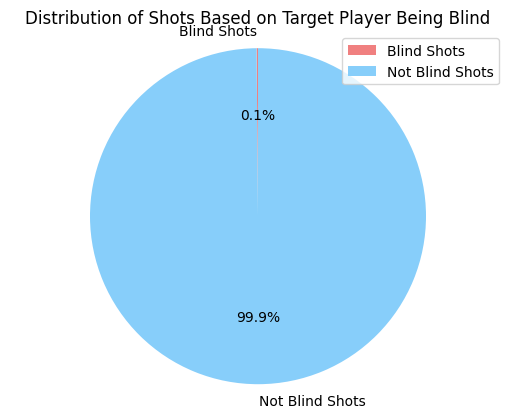

In [17]:
import matplotlib.pyplot as plt

df=pd.read_csv("./professional.csv")

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)

## Cheating dataset

Number of times the target player was blind and shot landed on the target: 124
Number of times the target player was not blind and shot landed on the target: 2006456


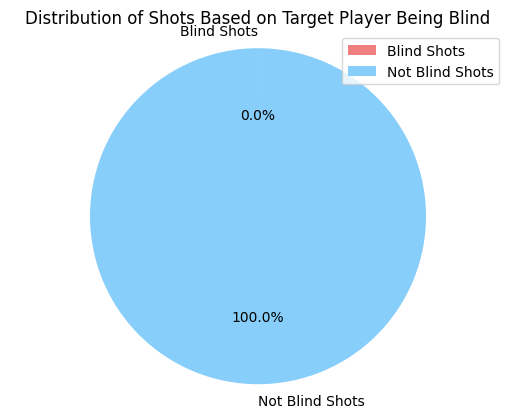

In [18]:
import matplotlib.pyplot as plt

df=pd.read_csv("./cheating.csv")

def question10(dataframe):
    def count_blind_shots(dataframe):
        blind_data = dataframe[dataframe['isTargetBlind'].fillna(False).astype(bool)]
        not_blind_data = dataframe[dataframe['isTargetBlind'].fillna(True).astype(bool)]

        blind_shot_count = len(blind_data)
        not_blind_shot_count = len(not_blind_data)

        return blind_shot_count, not_blind_shot_count

    blind_shot_count, not_blind_shot_count = count_blind_shots(dataframe)

    print(f"Number of times the target player was blind and shot landed on the target: {blind_shot_count}")
    print(f"Number of times the target player was not blind and shot landed on the target: {not_blind_shot_count}")

    # Visualize with a pie chart
    labels = ['Blind Shots', 'Not Blind Shots']
    sizes = [blind_shot_count, not_blind_shot_count]

    # Check if there are any blind shots before creating the pie chart
    if any(sizes):
        plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
        plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.

        plt.title('Distribution of Shots Based on Target Player Being Blind')

        # Add legend
        plt.legend(labels, loc='upper right')

        plt.show()
    else:
        print("No shots to display.")

question10(df)